In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import os
import rasterio
import scipy
#import netcdf4
import pandas as pd
#import cartopy
#from cdo import *
#from cdo import Cdo
#cdo = Cdo()

## 提取每个土壤样本点的极端气候指数

In [21]:
import xarray as xr
import pandas as pd
import numpy as np
import os

# 设置 NetCDF 文件夹路径
nc_folder = r'/mnt/g/ERA5-ECI/Annual/'

# 读取包含 LON 和 LAT 的 CSV 文件
df_dict = {
    2009: pd.read_csv(r'/mnt/d/study/组会/data/SOC/soc_filled_2009_with_SOC.csv'),
    2015: pd.read_csv(r'/mnt/d/study/组会/data/SOC/soc_filled_2015_with_SOC.csv'),
    2018: pd.read_csv(r'/mnt/d/study/组会/data/SOC/soc_filled_2018_with_SOC.csv')
}

# 获取所有 NetCDF 文件路径
nc_files = [os.path.join(nc_folder, f) for f in os.listdir(nc_folder) if f.endswith(".nc")]

def extract_climate_data(df, year):
    for nc_file in nc_files:
        ds = xr.open_dataset(nc_file)
        ds_year = ds.sel(time=str(year))
        # **变量列表（去掉 lat/lon/time）**
        variables = [var for var in ds_year.data_vars if var not in ['lat', 'lon', 'time','time_bnds']]
        # **插值缺失值**
        ds_year = ds_year.sortby('lat').sortby('lon')
        for var in variables:
            sample = ds_year[var]
            ds_year[var] = ds_year[var].astype('float32')
            ds_year[var] = ds_year[var].where(~np.isnan(sample), np.nan)  # 显式保留 NaN
            ds_year[var] = ds_year[var].interpolate_na(dim="lat", method="nearest")
            ds_year[var] = ds_year[var].interpolate_na(dim="lon", method="nearest")
        # **遍历站点数据，获取对应气候变量值**
        for var in variables:
            values = []
            for _, row in df.iterrows():
                lat, lon = row['Latitude'], row['Longitude']
                val = ds_year[var].sel(lat=lat, lon=lon, method='nearest').values
                # 如果 val > 10000，则进行转换
                if val > 100000:
                    val = np.round(val / 86400000000000) 
                values.append(np.nanmean(val))
            df[var] = values
    return df

# **处理所有年份的数据**
df_updated = {}
for year, df in df_dict.items():
    df_updated[year] = extract_climate_data(df, year)
    output_file = f'/mnt/d/study/组会/data/SOC/soc_filled_{year}.csv'
    df_updated[year].to_csv(output_file, index=False)
    print(f'✅ Saved: {output_file}')

print("🎉 所有 CSV 处理完成！")


/tmp/ipykernel_437/3548072407.py:13: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  2018: pd.read_csv(r'/mnt/d/study/组会/data/SOC/soc_filled_2018_with_SOC.csv')
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view(

✅ Saved: /mnt/d/study/组会/data/SOC/soc_filled_2009.csv


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda

✅ Saved: /mnt/d/study/组会/data/SOC/soc_filled_2015.csv


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda

✅ Saved: /mnt/d/study/组会/data/SOC/soc_filled_2018.csv
🎉 所有 CSV 处理完成！


### 针对2009年错误的一些点位

In [12]:
import xarray as xr
import pandas as pd
import numpy as np
import os

# 设置 NetCDF 文件夹路径
nc_folder = r'/mnt/f/ERA5-ECI/Annual/'

# 读取包含 LON 和 LAT 的 CSV 文件
df_dict = {
    2009: pd.read_csv(r'/mnt/d/study/组会/data/SOC/LUCAS/2009_nan.csv'),
}

# 获取所有 NetCDF 文件路径
nc_files = [os.path.join(nc_folder, f) for f in os.listdir(nc_folder) if f.endswith(".nc")]

def extract_climate_data(df, year):
    for nc_file in nc_files:
        ds = xr.open_dataset(nc_file)
        ds_year = ds.sel(time=str(year))
        # **变量列表（去掉 lat/lon/time）**
        variables = [var for var in ds_year.data_vars if var not in ['lat', 'lon', 'time','time_bnds']]
        # **插值缺失值**
        ds_year = ds_year.sortby('lat').sortby('lon')
        for var in variables:
            sample = ds_year[var]
            ds_year[var] = ds_year[var].astype('float32')
            ds_year[var] = ds_year[var].where(~np.isnan(sample), np.nan)  # 显式保留 NaN
            ds_year[var] = ds_year[var].interpolate_na(dim="lat", method="nearest")
            ds_year[var] = ds_year[var].interpolate_na(dim="lon", method="nearest")
        # **遍历站点数据，获取对应气候变量值**
        for var in variables:
            values = []
            for _, row in df.iterrows():
                lat, lon = row['Latitude'], row['Longitude']
                val = ds_year[var].sel(lat=lat, lon=lon, method='nearest').values
                # 如果 val > 10000，则进行转换
                if val > 100000:
                    val = np.round(val / 86400000000000) 
                values.append(np.nanmean(val))
            df[var] = values
    return df

# **处理所有年份的数据**
df_updated = {}
for year, df in df_dict.items():
    df_updated[year] = extract_climate_data(df, year)
    output_file = f'/mnt/d/study/组会/data/SOC/LUCAS/eci_nan_{year}.csv'
    df_updated[year].to_csv(output_file, index=False)
    print(f'✅ Saved: {output_file}')

print("🎉 所有 CSV 处理完成！")


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda

✅ Saved: /mnt/d/study/组会/data/SOC/LUCAS/eci_nan_2009.csv
🎉 所有 CSV 处理完成！


In [5]:
import pandas as pd
import numpy as np

# 定义文件路径
file_paths = [
    "/mnt/d/study/组会/data/SOC/2009_soc_with_climate.csv",
    "/mnt/d/study/组会/data/SOC/2015_soc_with_climate.csv",
    "/mnt/d/study/组会/data/SOC/2018_soc_with_climate.csv"
]

# 处理 CSV 文件
for file_path in file_paths:
    # 读取数据
    df = pd.read_csv(file_path)

    # 选取索引 19 及之后的列
    cols_to_process = df.columns[19:]

    # 转换文本格式为数值格式
    df[cols_to_process] = df[cols_to_process].apply(pd.to_numeric, errors='coerce')

    # 处理缺失值 (-9223372000000000000 视为 NaN)
    df.replace(-9223372000000000000, np.nan, inplace=True)
    df.replace(-9220000000000000000, np.nan, inplace=True)

    # 处理大于 10000 的值（除以 86400000000000）
    df[cols_to_process] = df[cols_to_process].applymap(
        lambda x: x / 86400000000000 if x > 10000 else x
    )

    # 生成新文件名
    new_file_path = file_path.replace(".csv", "_processed.csv")

    # 保存处理后的 CSV
    df.to_csv(new_file_path, index=False)

    print(f"Processed file saved: {new_file_path}")


Processed file saved: /mnt/d/study/组会/data/SOC/2009_soc_with_climate_processed.csv
Processed file saved: /mnt/d/study/组会/data/SOC/2015_soc_with_climate_processed.csv


/tmp/ipykernel_475/2595269052.py:14: DtypeWarning: Columns (5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Processed file saved: /mnt/d/study/组会/data/SOC/2018_soc_with_climate_processed.csv


## 氮肥

In [ ]:
import xarray as xr
import cftime

# 使用xarray打开温度数据的nc文件
ds_nfer_crop_no3 = xr.open_dataset(r'/mnt/g/History of anthropogenic Nitrogen inputs/Tian-etal_2022_allfiles/nfer_crop_no3.nc',decode_times= False)


# 假设 ds 是你的数据集，并且 'time' 是时间维度变量
time_vals = ds_nfer_crop_no3['time'].values  # 原始的时间值，表示从1925年开始的年份数

# 创建从1925年开始的年份数组
start_year = 1925
time_dates = [pd.Timestamp(f"{int(start_year + year)}-01-01") for year in time_vals]

# 将新的时间变量赋给数据集
ds_nfer_crop_no3['time'] = ('time', time_dates)

ds_nfer_crop_no3


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/f/History of anthropogenic Nitrogen inputs/Tian-etal_2022_allfiles/nfer_crop_no3.nc'

In [17]:
import xarray as xr
import cftime

# 使用xarray打开温度数据的nc文件
ds_nfer_crop_nh4 = xr.open_dataset(r'/mnt/f/History of anthropogenic Nitrogen inputs/Tian-etal_2022_allfiles/nfer_crop_nh4.nc',decode_times= False)


# 假设 ds 是你的数据集，并且 'time' 是时间维度变量
time_vals = ds_nfer_crop_nh4['time'].values  # 原始的时间值，表示从1925年开始的年份数

# 创建从1925年开始的年份数组
start_year = 1925
time_dates = [pd.Timestamp(f"{int(start_year + year)}-01-01") for year in time_vals]

# 将新的时间变量赋给数据集
ds_nfer_crop_nh4['time'] = ('time', time_dates)

ds_nfer_crop_nh4


<xarray.Dataset>
Dimensions:        (time: 95, lat: 2160, lon: 4320)
Coordinates:
  * lon            (lon) float64 -180.0 -179.9 -179.8 ... 179.8 179.9 180.0
  * lat            (lat) float64 89.96 89.88 89.79 ... -89.79 -89.88 -89.96
  * time           (time) datetime64[ns] 1925-01-01 1926-01-01 ... 2019-01-01
Data variables:
    nfer_crop_nh4  (time, lat, lon) float64 ...
Attributes:
    title:    N input data for ESSD
    contact:  Hanqin Tian, tianhan@auburn.edu; Naiqing Pan, nzp0030@tigermail...

In [18]:
import xarray as xr
import cftime

# 使用xarray打开温度数据的nc文件
ds_ndep_nhx = xr.open_dataset(r'/mnt/f/History of anthropogenic Nitrogen inputs/Tian-etal_2022_allfiles/ndep_nhx.nc',decode_times= False)

# 假设 ds 是你的数据集，并且 'time' 是时间维度变量
time_vals = ds_ndep_nhx['time'].values  # 原始的时间值，表示从1925年开始的年份数

# 创建从1925年开始的年份数组
start_year = 1850
time_dates = [pd.Timestamp(f"{int(start_year + year)}-01-01") for year in time_vals]

# 将新的时间变量赋给数据集
ds_ndep_nhx['time'] = ('time', time_dates)
ds_ndep_nhx


<xarray.Dataset>
Dimensions:   (time: 171, lat: 2160, lon: 4320)
Coordinates:
  * lon       (lon) float64 -180.0 -179.9 -179.8 -179.7 ... 179.8 179.9 180.0
  * lat       (lat) float64 89.96 89.88 89.79 89.71 ... -89.79 -89.88 -89.96
  * time      (time) datetime64[ns] 1850-01-01 1851-01-01 ... 2020-01-01
Data variables:
    ndep_nhx  (time, lat, lon) float64 ...
Attributes:
    title:    N input data for ESSD
    contact:  Hanqin Tian, tianhan@auburn.edu; Naiqing Pan, nzp0030@tigermail...

In [19]:
import xarray as xr
import cftime

# 使用xarray打开温度数据的nc文件
ds_ndep_noy = xr.open_dataset(r'/mnt/f/History of anthropogenic Nitrogen inputs/Tian-etal_2022_allfiles/ndep_noy.nc',decode_times= False)


# 假设 ds 是你的数据集，并且 'time' 是时间维度变量
time_vals = ds_ndep_noy['time'].values  # 原始的时间值，表示从1925年开始的年份数

# 创建从1925年开始的年份数组
start_year = 1850
time_dates = [pd.Timestamp(f"{int(start_year + year)}-01-01") for year in time_vals]

# 将新的时间变量赋给数据集
ds_ndep_noy['time'] = ('time', time_dates)
ds_ndep_noy


<xarray.Dataset>
Dimensions:   (time: 171, lat: 2160, lon: 4320)
Coordinates:
  * lon       (lon) float64 -180.0 -179.9 -179.8 -179.7 ... 179.8 179.9 180.0
  * lat       (lat) float64 89.96 89.88 89.79 89.71 ... -89.79 -89.88 -89.96
  * time      (time) datetime64[ns] 1850-01-01 1851-01-01 ... 2020-01-01
Data variables:
    ndep_noy  (time, lat, lon) float64 ...
Attributes:
    title:    N input data for ESSD
    contact:  Hanqin Tian, tianhan@auburn.edu; Naiqing Pan, nzp0030@tigermail...

In [20]:
import xarray as xr
import cftime

# 使用xarray打开温度数据的nc文件
ds_nfer_pas_nh4 = xr.open_dataset(r'/mnt/f/History of anthropogenic Nitrogen inputs/Tian-etal_2022_allfiles/nfer_pas_nh4.nc',decode_times= False)
# 假设 ds 是你的数据集，并且 'time' 是时间维度变量
time_vals = ds_nfer_pas_nh4['time'].values  # 原始的时间值，表示从1925年开始的年份数

# 创建从1961年开始的年份数组
start_year = 1961
time_dates = [pd.Timestamp(f"{int(start_year + year)}-01-01") for year in time_vals]

# 将新的时间变量赋给数据集
ds_nfer_pas_nh4['time'] = ('time', time_dates)
ds_nfer_pas_nh4


<xarray.Dataset>
Dimensions:       (time: 59, lat: 2160, lon: 4320)
Coordinates:
  * lon           (lon) float64 -180.0 -179.9 -179.8 ... 179.8 179.9 180.0
  * lat           (lat) float64 89.96 89.88 89.79 89.71 ... -89.79 -89.88 -89.96
  * time          (time) datetime64[ns] 1961-01-01 1962-01-01 ... 2019-01-01
Data variables:
    nfer_pas_nh4  (time, lat, lon) float64 ...
Attributes:
    title:    N input data for ESSD
    contact:  Hanqin Tian, tianhan@auburn.edu; Naiqing Pan, nzp0030@tigermail...

In [21]:
import xarray as xr
import cftime

# 使用xarray打开温度数据的nc文件
ds_nfer_pas_no3 = xr.open_dataset(r'/mnt/f/History of anthropogenic Nitrogen inputs/Tian-etal_2022_allfiles/nfer_pas_no3.nc',decode_times= False)
# 假设 ds 是你的数据集，并且 'time' 是时间维度变量
time_vals = ds_nfer_pas_no3['time'].values  # 原始的时间值，表示从1925年开始的年份数

# 创建从1961年开始的年份数组
start_year = 1961
time_dates = [pd.Timestamp(f"{int(start_year + year)}-01-01") for year in time_vals]

# 将新的时间变量赋给数据集
ds_nfer_pas_no3['time'] = ('time', time_dates)
ds_nfer_pas_no3


<xarray.Dataset>
Dimensions:       (time: 59, lat: 2160, lon: 4320)
Coordinates:
  * lon           (lon) float64 -180.0 -179.9 -179.8 ... 179.8 179.9 180.0
  * lat           (lat) float64 89.96 89.88 89.79 89.71 ... -89.79 -89.88 -89.96
  * time          (time) datetime64[ns] 1961-01-01 1962-01-01 ... 2019-01-01
Data variables:
    nfer_pas_no3  (time, lat, lon) float64 ...
Attributes:
    title:    N input data for ESSD
    contact:  Hanqin Tian, tianhan@auburn.edu; Naiqing Pan, nzp0030@tigermail...

In [22]:
import xarray as xr
import cftime

# 使用xarray打开温度数据的nc文件
ds_nmanure_app_crop = xr.open_dataset(r'/mnt/f/History of anthropogenic Nitrogen inputs/Tian-etal_2022_allfiles/nmanure_app_crop.nc',decode_times=False)

# 假设 ds 是你的数据集，并且 'time' 是时间维度变量
time_vals = ds_nmanure_app_crop['time'].values  # 原始的时间值，表示从1925年开始的年份数

# 创建从1961年开始的年份数组
start_year = 1860
time_dates = [pd.Timestamp(f"{int(start_year + year)}-01-01") for year in time_vals]

# 将新的时间变量赋给数据集
ds_nmanure_app_crop['time'] = ('time', time_dates)
ds_nmanure_app_crop


<xarray.Dataset>
Dimensions:           (time: 160, lat: 2160, lon: 4320)
Coordinates:
  * lon               (lon) float64 -180.0 -179.9 -179.8 ... 179.8 179.9 180.0
  * lat               (lat) float64 89.96 89.88 89.79 ... -89.79 -89.88 -89.96
  * time              (time) datetime64[ns] 1860-01-01 1861-01-01 ... 2019-01-01
Data variables:
    nmanure_app_crop  (time, lat, lon) float64 ...
Attributes:
    title:    N input data for ESSD
    contact:  Hanqin Tian, tianhan@auburn.edu; Naiqing Pan, nzp0030@tigermail...

In [23]:
import xarray as xr
import cftime

# 使用xarray打开温度数据的nc文件
ds_nmanure_app_pas = xr.open_dataset(r'/mnt/f/History of anthropogenic Nitrogen inputs/Tian-etal_2022_allfiles/nmanure_app_pas.nc',decode_times=False)

# 假设 ds 是你的数据集，并且 'time' 是时间维度变量
time_vals = ds_nmanure_app_pas['time'].values  # 原始的时间值，表示从1925年开始的年份数

# 创建从1961年开始的年份数组
start_year = 1860
time_dates = [pd.Timestamp(f"{int(start_year + year)}-01-01") for year in time_vals]

# 将新的时间变量赋给数据集
ds_nmanure_app_pas['time'] = ('time', time_dates)
ds_nmanure_app_pas


<xarray.Dataset>
Dimensions:          (time: 160, lat: 2160, lon: 4320)
Coordinates:
  * lon              (lon) float64 -180.0 -179.9 -179.8 ... 179.8 179.9 180.0
  * lat              (lat) float64 89.96 89.88 89.79 ... -89.79 -89.88 -89.96
  * time             (time) datetime64[ns] 1860-01-01 1861-01-01 ... 2019-01-01
Data variables:
    nmanure_app_pas  (time, lat, lon) float64 ...
Attributes:
    title:    N input data for ESSD
    contact:  Hanqin Tian, tianhan@auburn.edu; Naiqing Pan, nzp0030@tigermail...

In [24]:
import xarray as xr
import cftime

# 使用xarray打开温度数据的nc文件
ds_nmanure_dep_pas = xr.open_dataset(r'/mnt/f/History of anthropogenic Nitrogen inputs/Tian-etal_2022_allfiles/nmanure_dep_pas.nc',decode_times=False)

# 假设 ds 是你的数据集，并且 'time' 是时间维度变量
time_vals = ds_nmanure_dep_pas['time'].values  # 原始的时间值，表示从1925年开始的年份数

# 创建从1961年开始的年份数组
start_year = 1860
time_dates = [pd.Timestamp(f"{int(start_year + year)}-01-01") for year in time_vals]

# 将新的时间变量赋给数据集
ds_nmanure_dep_pas['time'] = ('time', time_dates)
ds_nmanure_dep_pas


<xarray.Dataset>
Dimensions:          (time: 160, lat: 2160, lon: 4320)
Coordinates:
  * lon              (lon) float64 -180.0 -179.9 -179.8 ... 179.8 179.9 180.0
  * lat              (lat) float64 89.96 89.88 89.79 ... -89.79 -89.88 -89.96
  * time             (time) datetime64[ns] 1860-01-01 1861-01-01 ... 2019-01-01
Data variables:
    nmanure_dep_pas  (time, lat, lon) float64 ...
Attributes:
    title:    N input data for ESSD
    contact:  Hanqin Tian, tianhan@auburn.edu; Naiqing Pan, nzp0030@tigermail...

In [25]:
import xarray as xr
import cftime

# 使用xarray打开温度数据的nc文件
ds_nmanure_dep_range = xr.open_dataset(r'/mnt/f/History of anthropogenic Nitrogen inputs/Tian-etal_2022_allfiles/nmanure_dep_range.nc',decode_times=False)

# 假设 ds 是你的数据集，并且 'time' 是时间维度变量
time_vals = ds_nmanure_dep_range['time'].values  # 原始的时间值，表示从1925年开始的年份数

# 创建从1961年开始的年份数组
start_year = 1860
time_dates = [pd.Timestamp(f"{int(start_year + year)}-01-01") for year in time_vals]

# 将新的时间变量赋给数据集
ds_nmanure_dep_range['time'] = ('time', time_dates)
ds_nmanure_dep_range


<xarray.Dataset>
Dimensions:            (time: 160, lat: 2160, lon: 4320)
Coordinates:
  * lon                (lon) float64 -180.0 -179.9 -179.8 ... 179.8 179.9 180.0
  * lat                (lat) float64 89.96 89.88 89.79 ... -89.79 -89.88 -89.96
  * time               (time) datetime64[ns] 1860-01-01 ... 2019-01-01
Data variables:
    nmanure_dep_range  (time, lat, lon) float64 ...
Attributes:
    title:    N input data for ESSD
    contact:  Hanqin Tian, tianhan@auburn.edu; Naiqing Pan, nzp0030@tigermail...

In [24]:
import xarray as xr
import pandas as pd
import numpy as np
import os


# 读取包含 LON 和 LAT 的 CSV 文件
df_dict = {
    2009: pd.read_csv(r'/mnt/d/study/组会/data/SOC/soc_filled_2009.csv'),
    2015: pd.read_csv(r'/mnt/d/study/组会/data/SOC/soc_filled_2015.csv'),
    2018: pd.read_csv(r'/mnt/d/study/组会/data/SOC/soc_filled_2018.csv')
}

# 获取所有 NetCDF 文件路径
ds_files = [ds_nfer_crop_no3,ds_nfer_crop_nh4,ds_ndep_nhx,ds_ndep_noy,ds_nfer_pas_nh4,ds_nfer_pas_no3,ds_nmanure_app_crop,ds_nmanure_app_pas,ds_nmanure_dep_pas,ds_nmanure_dep_range]

def extract_climate_data(df, year):
    for ds in ds_files:
        ds_year = ds.sel(time=str(year))
        # **变量列表（去掉 lat/lon/time）**
        variables = [var for var in ds_year.data_vars if var not in ['lat', 'lon', 'time']]
        ds_year = ds_year.sortby('lat').sortby('lon')
        for var in variables:
            ds_year[var] = ds_year[var].interpolate_na(dim="lat", method="nearest")
            ds_year[var] = ds_year[var].interpolate_na(dim="lon", method="nearest")
        # **遍历站点数据，获取对应气候变量值**
        for var in variables:
            values = []
            for _, row in df.iterrows():
                lat, lon = row['Latitude'], row['Longitude']
                val = ds_year[var].sel(lat=lat, lon=lon, method='nearest').values
                values.append(np.nanmean(val))
            df[var] = values
    return df

# **处理所有年份的数据**
df_updated = {}
for year, df in df_dict.items():
    df_updated[year] = extract_climate_data(df, year)
    output_file = f'/mnt/d/study/组会/data/SOC/SOC_filled_{year}_with_N.csv'
    df_updated[year].to_csv(output_file, index=False)
    print(f'✅ Saved: {output_file}')

print("🎉 所有 CSV 处理完成！")


/tmp/ipykernel_437/843736814.py:11: DtypeWarning: Columns (7,8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  2018: pd.read_csv(r'/mnt/d/study/组会/data/SOC/soc_filled_2018.csv')


✅ Saved: /mnt/d/study/组会/data/SOC/SOC_filled_2009_with_N.csv
✅ Saved: /mnt/d/study/组会/data/SOC/SOC_filled_2015_with_N.csv
✅ Saved: /mnt/d/study/组会/data/SOC/SOC_filled_2018_with_N.csv
🎉 所有 CSV 处理完成！


### 针对2009年错误

In [26]:
# 读取包含 LON 和 LAT 的 CSV 文件
df_dict = {
    2009: pd.read_csv(r'/mnt/d/study/组会/data/SOC/LUCAS/2009_nan.csv'),
}


# 获取所有 NetCDF 文件路径
ds_files = [ds_nfer_crop_no3,ds_nfer_crop_nh4,ds_ndep_nhx,ds_ndep_noy,ds_nfer_pas_nh4,ds_nfer_pas_no3,ds_nmanure_app_crop,ds_nmanure_app_pas,ds_nmanure_dep_pas,ds_nmanure_dep_range]

def extract_climate_data(df, year):
    for ds in ds_files:
        ds_year = ds.sel(time=str(year))
        # **变量列表（去掉 lat/lon/time）**
        variables = [var for var in ds_year.data_vars if var not in ['lat', 'lon', 'time']]
        ds_year = ds_year.sortby('lat').sortby('lon')
        for var in variables:
            ds_year[var] = ds_year[var].interpolate_na(dim="lat", method="nearest")
            ds_year[var] = ds_year[var].interpolate_na(dim="lon", method="nearest")
        # **遍历站点数据，获取对应气候变量值**
        for var in variables:
            values = []
            for _, row in df.iterrows():
                lat, lon = row['Latitude'], row['Longitude']
                val = ds_year[var].sel(lat=lat, lon=lon, method='nearest').values
                values.append(np.nanmean(val))
            df[var] = values
    return df

# **处理所有年份的数据**
df_updated = {}
for year, df in df_dict.items():
    df_updated[year] = extract_climate_data(df, year)
    output_file = f'/mnt/d/study/组会/data/SOC/LUCAS/N_nan_{year}.csv'
    df_updated[year].to_csv(output_file, index=False)
    print(f'✅ Saved: {output_file}')

print("🎉 所有 CSV 处理完成！")

✅ Saved: /mnt/d/study/组会/data/SOC/LUCAS/N_nan_2009.csv
🎉 所有 CSV 处理完成！


## 提取每个土壤样本点的平均温度和年总降水

In [7]:

# 读取包含站点经纬度信息的CSV文件
df_stations = pd.read_csv('/mnt/d/study/组会/data/SOC/LUCAS/all_nan.csv')

# 使用xarray打开温度数据的nc文件
ds_temperature = xr.open_dataset(r'/mnt/f/ERA5-ECI/Annual/tmm_ANN_era5_land_only_0p09_deg_1981_2019.nc')
# 使用xarray打开降水数据的nc文件
ds_precipitation = xr.open_dataset(r'/mnt/f/ERA5-ECI/Annual/prcptot_ANN_era5_land_only_0p09_deg_1981_2019.nc')

# 选择温度数据和降水数据在目标年份范围（2009 - 2018年）内的数据
ds_temperature_target_years = ds_temperature.sel(time=slice('2009', '2018'))
ds_precipitation_target_years = ds_precipitation.sel(time=slice('2009', '2018'))

#用于存储每个站点平均温度的列表
average_temperature_list = []
# 用于存储每个站点平均降水的列表
average_precipitation_list = []

#插值一下
ds_temperature_target_years = ds_temperature_target_years.sortby('lat')
ds_temperature_target_years = ds_temperature_target_years.sortby('lon')
ds_temperature_filled = ds_temperature_target_years.interpolate_na(dim="lat", method="nearest")
ds_temperature_filled = ds_temperature_filled.interpolate_na(dim="lon", method="nearest")

ds_precipitation_target_years = ds_precipitation_target_years.sortby('lat')
ds_precipitation_target_years = ds_precipitation_target_years.sortby('lon')
ds_precipitation_filled = ds_precipitation_target_years.interpolate_na(dim="lat", method="nearest")
ds_precipitation_filled = ds_precipitation_filled.interpolate_na(dim="lon", method="nearest")


for index, row in df_stations.iterrows():
    station_lat = row['LAT']
    station_lon = row['LONG']
    # 提取对应站点位置在目标年份范围内的温度数据并计算平均温度
    temperature_values = ds_temperature_filled.sel(lat=station_lat, lon=station_lon, method='nearest')['tmm'].values
    average_temperature = np.nanmean(temperature_values)
    average_temperature_list.append(average_temperature)

    precipitation_values = ds_precipitation_filled.sel(lat=station_lat, lon=station_lon, method='nearest')['prcptot'].values
    average_precipitation = np.nanmean(precipitation_values)
    average_precipitation_list.append(average_precipitation)


# 将平均温度列和平均降水列添加到DataFrame中
df_stations['Average_Temperature_2009_2018'] = average_temperature_list
df_stations['Average_Precipitation_2009_2018'] = average_precipitation_list

# 将更新后的DataFrame保存为新的CSV文件
df_stations.to_csv('/mnt/d/study/组会/data/SOC/LUCAS/all_nan_tm_pre.csv', index=False)


In [3]:
import xarray as xr
import pandas as pd

# 读取包含站点经纬度信息的CSV文件
df_stations = pd.read_csv('/mnt/d/study/组会/data/SOC/bd_id_all.csv')

# 使用xarray打开温度数据的nc文件
ds_temperature = xr.open_dataset(r'/mnt/g/ERA5-ECI/tmm_ANN_era5_land_only_0p09_deg_1981_2019.nc')
# 使用xarray打开降水数据的nc文件
ds_precipitation = xr.open_dataset(r'/mnt/g/ERA5-ECI/prcptot_ANN_era5_land_only_0p09_deg_1981_2019.nc')

# 选择温度数据和降水数据在目标年份范围（2009 - 2018年）内的数据
ds_temperature_target_years = ds_temperature.sel(time=slice('2009', '2018'))
ds_precipitation_target_years = ds_precipitation.sel(time=slice('2009', '2018'))

# 用于存储每个站点平均温度的列表
average_temperature_list = []
# 用于存储每个站点平均降水的列表
average_precipitation_list = []

#插值一下
ds_temperature_target_years = ds_temperature_target_years.sortby('lat')
ds_temperature_target_years = ds_temperature_target_years.sortby('lon')
ds_temperature_filled = ds_temperature_target_years.interpolate_na(dim="lat", method="nearest")
ds_temperature_filled = ds_temperature_filled.interpolate_na(dim="lon", method="nearest")

ds_precipitation_target_years = ds_precipitation_target_years.sortby('lat')
ds_precipitation_target_years = ds_precipitation_target_years.sortby('lon')
ds_precipitation_filled = ds_precipitation_target_years.interpolate_na(dim="lat", method="nearest")
ds_precipitation_filled = ds_precipitation_filled.interpolate_na(dim="lon", method="nearest")


for index, row in df_stations.iterrows():
    station_lat = row['LAT']
    station_lon = row['LONG']
    # 提取对应站点位置在目标年份范围内的温度数据并计算平均温度
    temperature_values = ds_temperature_filled.sel(lat=station_lat, lon=station_lon, method='nearest')['tmm'].values
    average_temperature = np.nanmean(temperature_values)
    average_temperature_list.append(average_temperature)

    precipitation_values = ds_precipitation_filled.sel(lat=station_lat, lon=station_lon, method='nearest')['prcptot'].values
    average_precipitation = np.nanmean(precipitation_values)
    average_precipitation_list.append(average_precipitation)


# 将平均温度列和平均降水列添加到DataFrame中
df_stations['Average_Temperature_2009_2018'] = average_temperature_list
df_stations['Average_Precipitation_2009_2018'] = average_precipitation_list

# 将更新后的DataFrame保存为新的CSV文件
df_stations.to_csv('/mnt/d/study/组会/data/SOC/tm_pre_new.csv', index=False)



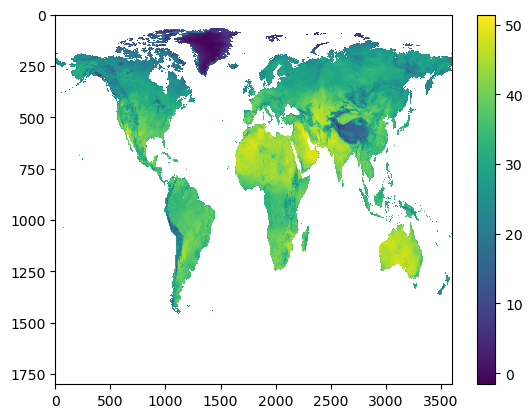

In [9]:
# 读取数据
data = xr.open_dataset(r'/mnt/g/ERA5-ECI/txx_ANN_era5_land_only_0p09_deg_1981_2019.nc')
# 创建图形和坐标轴对象
fig, ax = plt.subplots()
mesh = ax.pcolormesh(data.txx[-1])
# 反转y轴
ax.invert_yaxis()
# 添加颜色条
fig.colorbar(mesh)

# 显示图形
plt.show()

## 提取NPP

### 非多线程

In [15]:
import rasterio
import pandas as pd

def process_file(files):
    """
    处理单个TIFF文件，提取对应站点的数据并存储到results_dict中。
    :param files: TIFF文件路径
    """
    
    year_str = files.split('doy')[1][0:4]
    year = int(year_str)
    with rasterio.open(files) as src:
        transform = src.transform
        width = src.width
        height = src.height
        # 获取TIFF文件的地理坐标范围（边界框，格式为 (left, bottom, right, top)）
        min_lon, min_lat, max_lon, max_lat = src.bounds
        # 根据坐标范围筛选出在TIFF文件覆盖范围内的有效站点
        valid_stations = df_stations[(df_stations['TH_LONG'] >= min_lon) &
                                     (df_stations['TH_LONG'] <= max_lon) &
                                     (df_stations['TH_LAT'] >= min_lat) &
                                     (df_stations['TH_LAT'] <= max_lat)]
        # 创建一个布尔数组，用于标记哪些栅格在有效站点经纬度范围内，初始值设为False
        valid_mask = np.zeros((height, width), dtype=bool)
        for index, row in valid_stations.iterrows():
            lat = row['TH_LAT']
            lon = row['TH_LONG']
            row, col = src.index(lon, lat)
            valid_mask[row, col] = True

        # 只读取有效栅格区域的数据，使用窗口读取方式
        window = rasterio.windows.from_bounds(min_lon, min_lat, max_lon, max_lat, transform)
        window_data = src.read(1, window=window)
        # 遍历有效站点，获取对应栅格数据
        for index, row in valid_stations.iterrows():
            lat = row['TH_LAT']
            lon = row['TH_LONG']
            row, col = src.index(lon, lat)
            # 根据窗口和原始坐标计算在窗口数据中的相对坐标
            row_in_window = row - window.row_off
            col_in_window = col - window.col_off
            row_in_window = int(row - window.row_off)
            col_in_window = int(col - window.col_off)
            value = window_data[row_in_window, col_in_window]
            results_dict[(index, year)] = value

if __name__ == '__main__':
    # 用于存储提取结果的字典，键为(station_index, year)，值为数据值
    results_dict = {}

    # 读取包含站点经纬度信息的CSV文件
    df_stations = pd.read_csv('/mnt/d/study/组会/data/SOC/bd_soc_2.csv')
    # 定义三年对应的TIFF文件路径
    tiff_files = ['/mnt/f/MODIS-NPP/MOD17A3/MOD17A3HGF.061_Npp_500m_doy2009001_aid0001.tif',
                  '/mnt/f/MODIS-NPP/MOD17A3/MOD17A3HGF.061_Npp_500m_doy2015001_aid0001.tif',
                  '/mnt/f/MODIS-NPP/MOD17A3/MOD17A3HGF.061_Npp_500m_doy2018001_aid0001.tif']

    # 创建进程池，可根据实际情况调整进程数量，这里设置为3（和TIFF文件数量相同只是示例，可灵活调整）
    for files in tiff_files:
        process_file(files)
        
    # 在原DataFrame中增加新的列
    for index, row in df_stations.iterrows():
        for time in [2009, 2015, 2018]:
            df_stations.at[index, str(time)] = results_dict[(index, time)]


    # 将更新后的DataFrame保存为新的CSV文件
    df_stations.to_csv('/mnt/d/study/组会/data/SOC/npp_soc.csv', index=False)

### 试图多线程（但失败）

In [10]:
import numpy as np
import rasterio
import pandas as pd
from concurrent.futures import ProcessPoolExecutor
from multiprocessing import Manager 


def process_file(files):
    """
    处理单个TIFF文件，提取对应站点的数据并存储到results_dict中。
    :param files: TIFF文件路径
    """
    
    year_str = files.split('doy')[1][0:4]
    year = int(year_str)
    with rasterio.open(files) as src:
        transform = src.transform
        width = src.width
        height = src.height
        # 获取TIFF文件的地理坐标范围（边界框，格式为 (left, bottom, right, top)）
        min_lon, min_lat, max_lon, max_lat = src.bounds
        # 根据坐标范围筛选出在TIFF文件覆盖范围内的有效站点
        valid_stations = df_stations[(df_stations['TH_LONG'] >= min_lon) &
                                     (df_stations['TH_LONG'] <= max_lon) &
                                     (df_stations['TH_LAT'] >= min_lat) &
                                     (df_stations['TH_LAT'] <= max_lat)]
        # 创建一个布尔数组，用于标记哪些栅格在有效站点经纬度范围内，初始值设为False
        valid_mask = np.zeros((height, width), dtype=bool)
        for index, row in valid_stations.iterrows():
            lat = row['TH_LAT']
            lon = row['TH_LONG']
            row, col = src.index(lon, lat)
            valid_mask[row, col] = True
        # 只读取有效栅格区域的数据，使用窗口读取方式
        window = rasterio.windows.from_bounds(min_lon, min_lat, max_lon, max_lat, transform)
        window_data = src.read(1, window=window)
        # 遍历有效站点，获取对应栅格数据
        for index, row in valid_stations.iterrows():
            lat = row['TH_LAT']
            lon = row['TH_LONG']
            row, col = src.index(lon, lat)
            # 根据窗口和原始坐标计算在窗口数据中的相对坐标
            row_in_window = row - window.row_off
            col_in_window = col - window.col_off
            row_in_window = int(row - window.row_off)
            col_in_window = int(col - window.col_off)
            value = window_data[row_in_window, col_in_window]
            results_dict[(index, year)] = value
            # 在原DataFrame中增加新的列
    for index, row in df_stations.iterrows():
        for time in [2009, 2015, 2018]:
            df_stations.at[index, str(time)] = results_dict[(index, time)]

def process_all_nc_files(tiff_files):
    """利用多进程加速"""   
    with ProcessPoolExecutor(max_workers=3) as executor:
        for files in tiff_files:
            executor.submit(process_file, tiff_files)
            
            
if __name__ == '__main__':
    results_dict = {}
    # 读取包含站点经纬度信息的CSV文件
    df_stations = pd.read_csv('/mnt/d/study/组会/data/SOC/bd_soc.csv')
    # 定义三年对应的TIFF文件路径
    tiff_files = ['/mnt/f/MODIS-NPP/MOD17A3/MOD17A3HGF.061_Npp_500m_doy2009001_aid0001.tif',
                  '/mnt/f/MODIS-NPP/MOD17A3/MOD17A3HGF.061_Npp_500m_doy2015001_aid0001.tif',
                  '/mnt/f/MODIS-NPP/MOD17A3/MOD17A3HGF.061_Npp_500m_doy2018001_aid0001.tif']
    process_all_nc_files(tiff_files)
    # 将更新后的DataFrame保存为新的CSV文件
    df_stations.to_csv('/mnt/d/study/组会/data/SOC/npp_soc.csv', index=False)



In [1]:
import rasterio
import pandas as pd
import numpy as np


In [2]:
#定义提取tiff对应站点数据的函数
def extract_env_factor(lon, lat, raster_path):
    try:
        with rasterio.open(raster_path) as src:
            row, col = src.index(lon, lat)
            value = src.read(1)[row, col]
            return value
    except IndexError:
        return float('nan')  # 返回NaN表示出现索引越界错误，无法获取对应值

AWC_file = '/mnt/d/study/组会/data/SOC/Topsoil physical properties/AWC_Extra/AWC.tif' 
Clay_file = '/mnt/d/study/组会/data/SOC/Topsoil physical properties/Clay_Extra/Clay.tif' 
Sand_file = '/mnt/d/study/组会/data/SOC/Topsoil physical properties/Sand_Extra/Sand1.tif' 
Silt_file = '/mnt/d/study/组会/data/SOC/Topsoil physical properties/Silt_Extra/Silt1.tif' 
TextureUSDA_file = '/mnt/d/study/组会/data/SOC/Topsoil physical properties/TextureUSDA_Extra/TextureUSDA.tif' 


csv_file = '/mnt/d/study/组会/data/SOC/bd_soc.csv' 
df = pd.read_csv(csv_file)
merged_df = df.copy()


# 遍历站点数据，提取环境因子
for index, row in df.iterrows():
    lon = row['TH_LONG']
    lat = row['TH_LAT']
    AWC_value = extract_env_factor(lon, lat, AWC_file)
#添加环境因子到dataframe中
    merged_df.at[index, 'AWC'] = AWC_value

KeyboardInterrupt: 

## HDF转tiff

### HDF转拼接tiff

In [5]:
import os
import glob
import rasterio
from rasterio.merge import merge

# === 路径设置 ===
base_dir = "/mnt/d/study/组会/DATA/SOC/GLASS_NPP_EU_UK_Data"
output_dir = "/mnt/d/study/组会/DATA/SOC/GLASS_NPP_TIFF"
os.makedirs(output_dir, exist_ok=True)

# === 遍历 2009 到 2018 年份文件夹 ===
for year in range(2009, 2019):
    year_folder = os.path.join(base_dir, str(year))
    # 使用 glob 查找所有 .hdf 文件
    # 加上 GLASS17E11.* 可以更精确地匹配文件
    hdf_files = glob.glob(os.path.join(year_folder, "GLASS17E11.*.hdf"))

    datasets = []
    print(f"\n--- 正在处理年份: {year} ---")

    if not hdf_files:
        print(f"⚠️ 在 {year_folder} 中没有找到匹配的 HDF 文件。")
        continue

    for hdf in hdf_files:
        try:
            # *** 核心修改在这里 ***
            # 根据 gdalinfo 输出，数据在主波段，直接打开文件即可
            print(f"尝试直接打开文件: {hdf}")
            src = rasterio.open(hdf)
            # gdalinfo 证实数据是作为文件的主波段暴露的，不是作为子数据集。
            # 所以直接将打开的 DatasetReader 对象添加到列表中。
            datasets.append(src)
            print(f"成功打开 {hdf}")

        except rasterio.errors.RasterioIOError as e:
             # 捕获 rasterio 级别的 IO 错误
             print(f"⚠️ 读取文件 {hdf} 时发生 RasterioIOError: {e}")
        except Exception as e:
            # 捕获其他意外错误
            print(f"⚠️ 处理文件 {hdf} 时发生意外错误: {e}")


    if not datasets:
        print(f"❌ 年份 {year} 没有成功读取任何瓦片数据，跳过。")
        continue

    # === 拼接瓦片 ===
    print(f"准备拼接年份 {year} 的 {len(datasets)} 个瓦片。")
    try:
        # merge 函数接受一个 DatasetReader 对象的列表
        mosaic, transform = merge(datasets)

        # 更新输出文件的配置文件
        # 使用第一个数据集的 profile 作为基础，然后更新尺寸和仿射变换
        out_profile = datasets[0].profile.copy() # 使用 .copy() 避免修改原始 profile
        out_profile.update({
            "height": mosaic.shape[1],
            "width": mosaic.shape[2],
            "transform": transform,
            "driver": "GTiff", # 指定输出格式
            # 根据 gdalinfo 输出，这是单波段数据
            "count": 1,
            # "dtype": mosaic.dtype # 通常使用拼接结果的 dtype (应为 UInt32)
        })
        # 移除 profile 中可能存在的旧的仿射变换键名
        if 'affine' in out_profile: del out_profile['affine']

        # *** 添加 NoData 值 ***
        # 根据 gdalinfo 输出，_FillValue 是 4294967295
        # 优先从原始数据集的 profile 或 meta 中获取，如果都没有则硬编码
        if 'nodata' in datasets[0].profile and datasets[0].profile['nodata'] is not None:
             out_profile['nodata'] = datasets[0].profile['nodata']
        elif '_FillValue' in datasets[0].meta:
             # 有些格式的 NoData 在 meta 中
             out_profile['nodata'] = datasets[0].meta['_FillValue']
        else:
             # 根据 gdalinfo 硬编码 GLASS NPP 的 NoData 值
             out_profile['nodata'] = 4294967295


        # === 保存为 GeoTIFF ===
        out_path = os.path.join(output_dir, f"glass_npp_{year}.tif")
        print(f"保存拼接结果到: {out_path}")
        with rasterio.open(out_path, "w", **out_profile) as dst:
            # 根据 gdalinfo，数据是 UInt32，单波段
            # merge 后如果只有一波段，mosaic.shape 会是 (height, width)
            # 如果因为某些原因 merge 结果是 (1, height, width)，需要取第一波段
            if mosaic.ndim == 3: # 如果是多波段 (merge 结果形状是 (count, height, width))
                # 写入第一波段 (对于 GLASS NPP 来说这是唯一波段)
                dst.write(mosaic[0,:,:], 1)
            else: # 如果是单波段 (merge 结果形状是 (height, width))
                 dst.write(mosaic, 1)


        print(f"✅ 已完成年份 {year} 的拼接并保存为 TIFF：{out_path}")

    except Exception as e:
        print(f"❌ 年份 {year} 拼接或保存 TIFF 时发生错误: {e}")

    finally:
        # === 关闭数据集以释放资源 ===
        for ds in datasets:
            if not ds.closed: # 检查是否已关闭，避免重复关闭报错
                ds.close()
        print(f"--- 年份 {year} 处理结束 ---")


--- 正在处理年份: 2009 ---
尝试直接打开文件: /mnt/d/study/组会/DATA/SOC/GLASS_NPP_EU_UK_Data/2009/GLASS17E11.V60.A2009001.h17v03.2022100.hdf
成功打开 /mnt/d/study/组会/DATA/SOC/GLASS_NPP_EU_UK_Data/2009/GLASS17E11.V60.A2009001.h17v03.2022100.hdf
尝试直接打开文件: /mnt/d/study/组会/DATA/SOC/GLASS_NPP_EU_UK_Data/2009/GLASS17E11.V60.A2009001.h17v04.2022100.hdf
成功打开 /mnt/d/study/组会/DATA/SOC/GLASS_NPP_EU_UK_Data/2009/GLASS17E11.V60.A2009001.h17v04.2022100.hdf
尝试直接打开文件: /mnt/d/study/组会/DATA/SOC/GLASS_NPP_EU_UK_Data/2009/GLASS17E11.V60.A2009001.h17v05.2022100.hdf
成功打开 /mnt/d/study/组会/DATA/SOC/GLASS_NPP_EU_UK_Data/2009/GLASS17E11.V60.A2009001.h17v05.2022100.hdf
尝试直接打开文件: /mnt/d/study/组会/DATA/SOC/GLASS_NPP_EU_UK_Data/2009/GLASS17E11.V60.A2009001.h18v01.2022100.hdf
成功打开 /mnt/d/study/组会/DATA/SOC/GLASS_NPP_EU_UK_Data/2009/GLASS17E11.V60.A2009001.h18v01.2022100.hdf
尝试直接打开文件: /mnt/d/study/组会/DATA/SOC/GLASS_NPP_EU_UK_Data/2009/GLASS17E11.V60.A2009001.h18v02.2022100.hdf
成功打开 /mnt/d/study/组会/DATA/SOC/GLASS_NPP_EU_UK_Data/2009/GLASS1

### 提取点数据

In [10]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import rasterio
import os
import numpy as np # 导入 numpy 来进行数值检查

# --- 设置你的文件路径 ---
points_path = "/mnt/d/study/组会/DATA/SOC/GLASS_NPP_EU_UK_Data/NPP_nan.csv" # 你的点数据 CSV 文件路径
mosaics_dir = "/mnt/d/study/组会/DATA/SOC/GLASS_NPP_TIFF" # 你镶嵌好的年度 TIFF 文件所在的文件夹
output_points_path = "/mnt/d/study/组会/DATA/SOC/points_with_npp.csv" # 结果保存路径，保存为 CSV 文件 (请确保这个路径的文件夹存在或脚本能创建)

start_year = 2009
end_year = 2018

# --- 1. 加载点数据 (从 CSV) ---
try:
    # 使用 pandas 读取 CSV 文件
    points_df = pd.read_csv(points_path)
    print(f"成功加载 {len(points_df)} 行数据从 {points_path}")

    # *** 将 pandas DataFrame 转换为 GeoDataFrame ***
    # 从经纬度列创建 Point 几何对象列表
    # Point(x, y) 对应 Point(经度, 纬度)
    # 请根据你的 CSV 列名检查 'Longitude' 和 'Latitude' 是否正确
    # 添加错误处理，如果列名不对则报错
    if 'Longitude' not in points_df.columns or 'Latitude' not in points_df.columns:
         raise KeyError("CSV文件中未找到 'Longitude' 或 'Latitude' 列。")

    geometry = [Point(xy) for xy in zip(points_df['Longitude'], points_df['Latitude'])]

    # 创建 GeoDataFrame，指定几何列和原始 CRS (通常 CSV 经纬度是 WGS84)
    points_gdf = gpd.GeoDataFrame(points_df, geometry=geometry, crs="EPSG:4326")

    print(f"转换为 GeoDataFrame，共 {len(points_gdf)} 个点。")
    print(f"点数据原始 CRS: {points_gdf.crs}")

except KeyError as e:
    print(f"❌ 错误: {e}")
    exit() # 如果列名不对，退出脚本
except Exception as e:
    print(f"❌ 加载和处理点数据从 CSV 失败: {e}")
    exit() # 如果加载或转换失败，退出脚本


# --- 2. 循环处理每年数据并提取 NPP ---
npp_columns = [] # 用于记录存储了 NPP 值的列名

for year in range(start_year, end_year + 1):
    year_mosaic_filename = f"glass_npp_{year}.tif"
    year_mosaic_path = os.path.join(mosaics_dir, year_mosaic_filename)
    year_col_name = f"NPP_{year}" # 为当前年份的 NPP 值创建列名
    npp_columns.append(year_col_name) # 将列名添加到列表中

    # 检查当前年份的镶嵌文件是否存在
    if not os.path.exists(year_mosaic_path):
        print(f"⚠️ 警告: 年份 {year} 的镶嵌文件未找到: {year_mosaic_path}。为该年份添加 NaN 值。")
        points_gdf[year_col_name] = np.nan
        continue # 跳过当前年份的处理，继续下一个年份

    try:
        print(f"\n--- 正在提取年份 {year} 的 NPP ---")
        with rasterio.open(year_mosaic_path) as src:
            # *** 检查并处理 CRS 不匹配 ***
            if points_gdf.crs is None:
                 print("⚠️ 警告: 点数据 CRS 未定义。假定与栅格 CRS 匹配，这可能导致错误结果！")
            elif src.crs is None:
                 print(f"⚠️ 警告: 栅格文件 {year_mosaic_filename} 没有定义 CRS。无法进行 CRS 检查或自动重投影。")
            elif points_gdf.crs != src.crs:
                 points_crs_info = points_gdf.crs.to_epsg() if points_gdf.crs.to_epsg() else points_gdf.crs
                 raster_crs_info = src.crs.to_epsg() if src.crs.to_epsg() else src.crs
                 print(f"🌐 CRS 不匹配！将点数据从 {points_crs_info} 重投影到栅格 CRS {raster_crs_info}")
                 # *** 重投影点数据 ***
                 points_gdf = points_gdf.to_crs(src.crs)

            # *** 提取重投影后的点坐标列表 ***
            # 使用 apply 和 tolist 方法获取坐标列表
            coords = points_gdf.geometry.apply(lambda p: (p.x, p.y)).tolist()

            # --- *** 调试信息：检查坐标列表 *** ---
            print(f"--- Debugging Coordinates ---")
            print(f"坐标列表长度 (应与点数相同): {len(coords)}")
            if len(coords) > 0:
                # 打印前5个坐标
                print(f"前 5 个重投影后的坐标 (x, y): {coords[:5]}")
                # 转换为 NumPy 数组，检查形状、数据类型、最小值、最大值
                try:
                    sample_coords_np = np.array(coords)
                    print(f"坐标 NumPy 数组形状: {sample_coords_np.shape} (应为 (点数, 2))")
                    print(f"坐标 NumPy 数组数据类型: {sample_coords_np.dtype} (应为 float 类型)")
                    if sample_coords_np.shape[0] > 0 and sample_coords_np.shape[1] == 2:
                        # 检查坐标范围
                        min_x, min_y = np.nanmin(sample_coords_np[:, 0]), np.nanmin(sample_coords_np[:, 1])
                        max_x, max_y = np.nanmax(sample_coords_np[:, 0]), np.nanmax(sample_coords_np[:, 1])
                        print(f"重投影后的 X 坐标范围: [{min_x}, {max_x}]")
                        print(f"重投影后的 Y 坐标范围: [{min_y}, {max_y}]")

                        # 检查是否存在 NaN 或 Inf 值
                        if np.any(np.isnan(sample_coords_np)) or np.any(np.isinf(sample_coords_np)):
                            print("⚠️ 警告: 重投影后的坐标包含 NaN 或 Inf 值！这会影响提取。")
                    else:
                         print("⚠️ 警告: 坐标 NumPy 数组形状异常，无法检查范围。")
                except Exception as np_err:
                    print(f"⚠️ 警告: 检查坐标 NumPy 数组时发生错误: {np_err}")

            else:
                 print("⚠️ 警告: 坐标列表为空！")
            print(f"--- End Debugging ---")
            # --- *** 结束调试信息 *** ---


            # --- 提取值 ---
            # Use rasterio.sample(coords)
            # 如果前面的调试信息显示 coords 列表正常，但这里仍然报错，
            # 问题可能出在 GDAL/rasterio 版本与特定投影/数据格式的交互上。
            extracted_values = [value[0] for value in src.sample(coords)]

            # 将提取到的值添加到 GeoDataFrame 的新列中
            points_gdf[year_col_name] = extracted_values

            # *** 将提取到的 NoData 值替换为 NaN ***
            nodata_value = src.nodata
            if nodata_value is not None:
                 print(f"栅格 NoData 值为: {nodata_value}")
                 points_gdf[year_col_name] = points_gdf[year_col_name].replace(nodata_value, np.nan)
                 print(f"已将年份 {year} 中提取的 NoData 值 ({nodata_value}) 替换为 NaN。")
            else:
                 print(f"栅格 {year_mosaic_filename} 没有明确的 NoData 值需要替换。")


        print(f"✅ 成功提取年份 {year} 的 NPP 值。")

    except Exception as e:
        print(f"❌ 提取年份 {year} 的 NPP 值失败: {e}")
        print(f"错误详情: {e}") # 打印更详细的错误信息
        points_gdf[year_col_name] = np.nan


# --- 3. 计算多年平均值 ---
print("\n--- 计算多年平均 NPP ---")
actual_npp_columns = [col for col in npp_columns if col in points_gdf.columns]

if not actual_npp_columns:
     print("⚠️ 没有成功提取任何年份的 NPP 数据，无法计算平均值。")
     points_gdf['Avg_NPP'] = np.nan # 确保 Avg_NPP 列存在，即使全是 NaN
else:
    npp_data_for_avg = points_gdf[actual_npp_columns]
    points_gdf['Avg_NPP'] = npp_data_for_avg.mean(axis=1)
    print("✅ 多年平均 NPP 计算完成。")


# --- 4. 保存结果 ---
try:
    print(f"\n--- 正在保存结果到 {output_points_path} (CSV 格式) ---")

    # *** 解决保存错误：检查并创建输出目录 ***
    output_dir = os.path.dirname(output_points_path)
    if output_dir and not os.path.exists(output_dir):
        print(f"创建输出目录: {output_dir}")
        os.makedirs(output_dir, exist_ok=True) # exist_ok=True 可以在目录已存在时不报错

    # 确保输出路径以 .csv 结尾 (可选)
    if not output_points_path.lower().endswith('.csv'):
         print(f"警告: 输出路径 {output_points_path} 不是 .csv 结尾，请手动确保格式正确。")

    points_gdf.to_csv(output_points_path, index=False)

    print("🎉🎉🎉 所有步骤完成！结果已保存到 CSV 文件。")

except Exception as e:
    print(f"❌ 保存输出 CSV 文件失败: {e}")
    print(f"错误详情: {e}")

成功加载 361 行数据从 /mnt/d/study/组会/DATA/SOC/GLASS_NPP_EU_UK_Data/NPP_nan.csv
转换为 GeoDataFrame，共 361 个点。
点数据原始 CRS: EPSG:4326

--- 正在提取年份 2009 的 NPP ---
🌐 CRS 不匹配！将点数据从 4326 重投影到栅格 CRS PROJCS["unnamed",GEOGCS["Unknown datum based upon the custom spheroid",DATUM["Not specified (based on custom spheroid)",SPHEROID["Custom spheroid",6371007.181,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Sinusoidal"],PARAMETER["longitude_of_center",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
❌ 提取年份 2009 的 NPP 值失败: x, y, z, and time must be same size
错误详情: x, y, z, and time must be same size

--- 正在提取年份 2010 的 NPP ---
🌐 CRS 不匹配！将点数据从 4326 重投影到栅格 CRS PROJCS["unnamed",GEOGCS["Unknown datum based upon the custom spheroid",DATUM["Not specified (based on custom spheroid)",SPHEROID["Custom spheroid",6371007.181,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925

In [ ]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import rasterio
import os
import numpy as np

# --- 设置你的文件路径 ---
# *** 注意：这里是你的 CSV 文件路径 ***
points_path = "/mnt/d/study/组会/DATA/SOC/GLASS_NPP_EU_UK_Data/NPP_nan.csv"
mosaics_dir = "/mnt/d/study/组会/DATA/SOC/GLASS_NPP_TIFF" # 你镶嵌好的年度 TIFF 文件所在的文件夹
# *** 注意：这里将输出路径改为 .csv 结尾 ***
output_points_path = "/mnt/d/study/组会/DATA/SOC/points_with_npp.csv" # 结果保存路径，保存为 CSV 文件

start_year = 2009
end_year = 2018

# --- 1. 加载点数据 (从 CSV) ---
try:
    # 使用 pandas 读取 CSV 文件
    # 确保你的经度和纬度列名正确，这里假设是 'Longitude' 和 'Latitude'
    points_df = pd.read_csv(points_path)
    print(f"成功加载 {len(points_df)} 行数据从 {points_path}")

    # *** 将 pandas DataFrame 转换为 GeoDataFrame ***
    # 从经纬度列创建 Point 几何对象列表
    # Point(x, y) 对应 Point(经度, 纬度)
    # 请根据你的 CSV 列名检查 'Longitude' 和 'Latitude' 是否正确
    geometry = [Point(xy) for xy in zip(points_df['Longitude'], points_df['Latitude'])]

    # 创建 GeoDataFrame，指定几何列和原始 CRS (通常 CSV 经纬度是 WGS84)
    # 如果你的 CSV 不是 WGS84 经纬度，请将 "EPSG:4326" 替换为正确的 CRS 代码或 Proj4 字符串
    points_gdf = gpd.GeoDataFrame(points_df, geometry=geometry, crs="EPSG:4326")

    print(f"转换为 GeoDataFrame，共 {len(points_gdf)} 个点。")
    print(f"点数据原始 CRS: {points_gdf.crs}")

except KeyError:
    print(f"❌ 错误: CSV 文件 {points_path} 中没有找到 'Latitude' 或 'Longitude' 列。请检查列名是否正确。")
    exit() # 如果列名不对，退出脚本
except Exception as e:
    print(f"❌ 加载和处理点数据从 CSV 失败: {e}")
    exit() # 如果加载或转换失败，退出脚本


# --- 2. 循环处理每年数据并提取 NPP ---
npp_columns = [] # 用于记录存储了 NPP 值的列名，方便后面计算平均值

for year in range(start_year, end_year + 1):
    year_mosaic_filename = f"glass_npp_{year}.tif"
    year_mosaic_path = os.path.join(mosaics_dir, year_mosaic_filename)
    year_col_name = f"NPP_{year}" # 为当前年份的 NPP 值创建列名，例如 "NPP_2009"
    npp_columns.append(year_col_name) # 将列名添加到列表中

    # 检查当前年份的镶嵌文件是否存在
    if not os.path.exists(year_mosaic_path):
        print(f"⚠️ 警告: 年份 {year} 的镶嵌文件未找到: {year_mosaic_path}。为该年份添加 NaN 值。")
        # 如果文件不存在，则为当前年份的列填充 NaN (Not a Number)
        points_gdf[year_col_name] = np.nan
        continue # 跳过当前年份的处理，继续下一个年份

    try:
        print(f"\n--- 正在提取年份 {year} 的 NPP ---")
        with rasterio.open(year_mosaic_path) as src:
            # *** 检查并处理 CRS 不匹配 ***
            # 现在 points_gdf 的 CRS 是 EPSG:4326 (假设的经纬度 CRS)
            # 栅格的 CRS 是 Sinusoidal (从栅格文件中读取)
            # 这里进行重投影，将点数据从点数据的 CRS 转到栅格的 CRS
            if points_gdf.crs is None:
                 print("⚠️ 警告: 点数据 CRS 未定义。假定与栅格 CRS 匹配，这可能导致错误结果！")
                 # 在这种情况下无法进行重投影，可能会提取到错误的值或报错
                 # 更好的做法是在加载点数据时确保设置了正确的原始 CRS
            elif src.crs is None:
                 print(f"⚠️ 警告: 栅格文件 {year_mosaic_filename} 没有定义 CRS。无法进行 CRS 检查或自动重投影。")
                 # 如果栅格没有 CRS，提取值可能会失败或结果不准确
                 # 你可能需要手动确定栅格 CRS，并在点数据加载时手动将其重投影到该 CRS
            elif points_gdf.crs != src.crs:
                 # 使用 .to_epsg() 获取 EPSG 代码（如果可用），否则显示完整 CRS 信息
                 points_crs_info = points_gdf.crs.to_epsg() if points_gdf.crs.to_epsg() else points_gdf.crs
                 raster_crs_info = src.crs.to_epsg() if src.crs.to_epsg() else src.crs
                 print(f"🌐 CRS 不匹配！将点数据从 {points_crs_info} 重投影到栅格 CRS {raster_crs_info}")
                 points_gdf = points_gdf.to_crs(src.crs) # 重投影点数据到栅格的 CRS

            # *** 获取重投影后的点坐标 ***
            # 使用重投影后的 GeoDataFrame 的几何列获取 (x, y) 坐标列表
            coords = [(x, y) for x, y in zip(points_gdf.geometry.x, points_gdf.geometry.y)]

            # --- 提取值 ---
            # rasterio.sample() 从栅格中提取点位置的值
            # 返回一个迭代器，每个元素是该点所有波段的值组成的数组 ([值1, 值2,...])
            # 由于 GLASS NPP 是单波段 TIFF，每个元素形如 [值]
            # [0] 表示取数组中的第一个元素（即该点在该波段的值）
            extracted_values = [value[0] for value in src.sample(coords)]

            # 将提取到的值添加到 GeoDataFrame 的新列中
            points_gdf[year_col_name] = extracted_values

            # *** 将提取到的 NoData 值替换为 NaN ***
            # 从栅格文件属性中获取 NoData 值，并将其替换为 NaN，以便在计算平均值时忽略
            nodata_value = src.nodata
            if nodata_value is not None:
                 # 使用 pandas 的 replace 方法将特定的 NoData 值替换为 np.nan
                 # errors='ignore' 确保如果 NoData 值不存在于列中也不会报错
                 points_gdf[year_col_name] = points_gdf[year_col_name].replace(nodata_value, np.nan)
                 print(f"已将年份 {year} 中提取的 NoData 值 ({nodata_value}) 替换为 NaN。")
            else:
                 print(f"栅格 {year_mosaic_filename} 没有明确的 NoData 值需要替换。")


        print(f"✅ 成功提取年份 {year} 的 NPP 值。")

    except Exception as e:
        print(f"❌ 提取年份 {year} 的 NPP 值失败: {e}")
        # 如果提取失败，为当前年份的列填充 NaN
        points_gdf[year_col_name] = np.nan


# --- 3. 计算多年平均值 ---
print("\n--- 计算多年平均 NPP ---")

# 从 GeoDataFrame 中选取所有包含年度 NPP 值的列
# npp_columns 列表包含了所有类似 "NPP_2009", "NPP_2010" 的列名
# 使用列表推导式过滤出实际存在于 GeoDataFrame 中的列名 (因为可能有年份文件缺失)
actual_npp_columns = [col for col in npp_columns if col in points_gdf.columns]

if not actual_npp_columns:
     print("⚠️ 没有成功提取任何年份的 NPP 数据，无法计算平均值。")
     # 如果没有提取到数据，Avg_NPP 列可能不会创建，或者会全是 NaN
     points_gdf['Avg_NPP'] = np.nan # 确保 Avg_NPP 列存在，即使全是 NaN
else:
    npp_data_for_avg = points_gdf[actual_npp_columns]

    # 使用 pandas 的 mean() 方法计算行的平均值
    # axis=1 表示按行计算平均 (即每个点的平均值)
    # skipna=True 是 mean() 的默认行为，它会自动跳过 NaN 值（包括因为 NoData 替换或文件缺失导致的 NaN）
    points_gdf['Avg_NPP'] = npp_data_for_avg.mean(axis=1)

    print("✅ 多年平均 NPP 计算完成。")


# --- 4. 保存结果 ---
try:
    print(f"\n--- 正在保存结果到 {output_points_path} (CSV 格式) ---")
    # *** 修改保存部分，使用 to_csv 方法 ***

    # 确保输出路径以 .csv 结尾
    if not output_points_path.lower().endswith('.csv'):
        print(f"警告: 输出路径 {output_points_path} 不是 .csv 结尾，将自动更改。")
        # os.path.splitext(output_points_path)[0] 获取文件主名（不含扩展名）
        output_points_path = os.path.splitext(output_points_path)[0] + '.csv'
        print(f"新的输出路径: {output_points_path}")

    # 使用 GeoDataFrame 的 to_csv 方法保存为 CSV 文件
    # GeoDataFrame 继承自 pandas DataFrame，所以可以直接用 to_csv
    # to_csv 会自动忽略 'geometry' 列
    # index=False 表示不将 DataFrame 的索引写入 CSV 文件
    points_gdf.to_csv(output_points_path, index=False)

    print("🎉🎉🎉 所有步骤完成！结果已保存。")

except Exception as e:
    print(f"❌ 保存输出 CSV 文件失败: {e}")

成功加载 361 行数据从 /mnt/d/study/组会/DATA/SOC/GLASS_NPP_EU_UK_Data/NPP_nan.csv
转换为 GeoDataFrame，共 361 个点。
点数据原始 CRS: EPSG:4326

--- 正在提取年份 2009 的 NPP ---
🌐 CRS 不匹配！将点数据从 4326 重投影到栅格 CRS PROJCS["unnamed",GEOGCS["Unknown datum based upon the custom spheroid",DATUM["Not specified (based on custom spheroid)",SPHEROID["Custom spheroid",6371007.181,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Sinusoidal"],PARAMETER["longitude_of_center",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
❌ 提取年份 2009 的 NPP 值失败: x, y, z, and time must be same size

--- 正在提取年份 2010 的 NPP ---
🌐 CRS 不匹配！将点数据从 4326 重投影到栅格 CRS PROJCS["unnamed",GEOGCS["Unknown datum based upon the custom spheroid",DATUM["Not specified (based on custom spheroid)",SPHEROID["Custom spheroid",6371007.181,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTI

## NC转tiff

In [4]:
import os
import xarray as xr
import geopandas as gpd
import rioxarray
import pandas as pd

# 配置路径
nc_folder = r'/mnt/g/History of anthropogenic Nitrogen inputs/Tian-etal_2022_allfiles'
shp_path = r"/mnt/d/study/组会/DATA/shp/combine/EU_1984.shp"
output_folder = r'/mnt/g/ECI_N'
os.makedirs(output_folder, exist_ok=True)

# 要提取的年份
years_to_extract = [2009, 2015, 2018]

# 各变量起始年份映射
start_year_dict = {
    'nfer_crop_no3': 1925,
    'nfer_crop_nh4': 1925,
    'ndep_nhx': 1850,
    'ndep_noy': 1850,
    'nfer_pas_nh4': 1961,
    'ds_nfer_pas_no3': 1961,
    'nmanure_app_crop': 1860,
    'nmanure_app_pas': 1860,
    'nmanure_dep_pas': 1860,
    'nmanure_dep_range': 1860
}

# 读取掩膜
mask = gpd.read_file(shp_path)
mask = mask.to_crs("EPSG:4326")

for filename in os.listdir(nc_folder):
    if filename.endswith(".nc"):
        filepath = os.path.join(nc_folder, filename)
        print(f"Processing: {filename}")

        try:
            ds = xr.open_dataset(filepath)
        except Exception:
            ds = xr.open_dataset(filepath, decode_times=False)
            var_names = list(ds.data_vars)
            if not var_names:
                continue
            var_name = var_names[0]
            if 'time' in ds.variables:
                time_vals = ds['time'].values
                # 根据变量名识别起始年份
                base_year = start_year_dict.get(var_name, 1900)
                time_dates = [pd.Timestamp(f"{int(base_year + year)}-01-01") for year in time_vals]
                ds['time'] = ('time', time_dates)

        # 主变量名
        var_names = list(ds.data_vars)
        if not var_names:
            continue
        var_name = var_names[0]
        da = ds[var_name]

        if "time" not in da.dims:
            print(f"Skipping {filename}: no time dimension")
            continue

        da = da.rio.write_crs("EPSG:4326", inplace=True)

        for year in years_to_extract:
            try:
                sel_time = da.sel(time=str(year), method="nearest")
                clipped = sel_time.rio.clip(mask.geometry, mask.crs, drop=True, invert=False)
                out_name = f"EU_{var_name}_{year}.tiff"
                out_path = os.path.join(output_folder, out_name)
                clipped.rio.to_raster(out_path)
                print(f"Saved: {out_path}")
            except Exception as e:
                print(f"Failed to extract year {year} from {filename}: {e}")


Processing: ndep_nhx.nc


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


Saved: /mnt/g/ECI_N/EU_ndep_nhx_2009.tiff


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


Saved: /mnt/g/ECI_N/EU_ndep_nhx_2015.tiff


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


Saved: /mnt/g/ECI_N/EU_ndep_nhx_2018.tiff
Processing: ndep_noy.nc


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


Saved: /mnt/g/ECI_N/EU_ndep_noy_2009.tiff


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


Saved: /mnt/g/ECI_N/EU_ndep_noy_2015.tiff


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


Saved: /mnt/g/ECI_N/EU_ndep_noy_2018.tiff
Processing: nfer_crop_nh4.nc


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


Saved: /mnt/g/ECI_N/EU_nfer_crop_nh4_2009.tiff


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


Saved: /mnt/g/ECI_N/EU_nfer_crop_nh4_2015.tiff


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


Saved: /mnt/g/ECI_N/EU_nfer_crop_nh4_2018.tiff
Processing: nfer_crop_no3.nc


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


Saved: /mnt/g/ECI_N/EU_nfer_crop_no3_2009.tiff


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


Saved: /mnt/g/ECI_N/EU_nfer_crop_no3_2015.tiff


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


Saved: /mnt/g/ECI_N/EU_nfer_crop_no3_2018.tiff
Processing: nfer_pas_nh4.nc


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


Saved: /mnt/g/ECI_N/EU_nfer_pas_nh4_2009.tiff


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


Saved: /mnt/g/ECI_N/EU_nfer_pas_nh4_2015.tiff


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


Saved: /mnt/g/ECI_N/EU_nfer_pas_nh4_2018.tiff
Processing: nfer_pas_no3.nc


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


Saved: /mnt/g/ECI_N/EU_nfer_pas_no3_2009.tiff


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


Saved: /mnt/g/ECI_N/EU_nfer_pas_no3_2015.tiff


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


Saved: /mnt/g/ECI_N/EU_nfer_pas_no3_2018.tiff
Processing: nmanure_app_crop.nc


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


Saved: /mnt/g/ECI_N/EU_nmanure_app_crop_2009.tiff


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


Saved: /mnt/g/ECI_N/EU_nmanure_app_crop_2015.tiff


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


Saved: /mnt/g/ECI_N/EU_nmanure_app_crop_2018.tiff
Processing: nmanure_app_pas.nc


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


Saved: /mnt/g/ECI_N/EU_nmanure_app_pas_2009.tiff


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


Saved: /mnt/g/ECI_N/EU_nmanure_app_pas_2015.tiff


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


Saved: /mnt/g/ECI_N/EU_nmanure_app_pas_2018.tiff
Processing: nmanure_dep_pas.nc


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


Saved: /mnt/g/ECI_N/EU_nmanure_dep_pas_2009.tiff


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


Saved: /mnt/g/ECI_N/EU_nmanure_dep_pas_2015.tiff


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


Saved: /mnt/g/ECI_N/EU_nmanure_dep_pas_2018.tiff
Processing: nmanure_dep_range.nc


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


Saved: /mnt/g/ECI_N/EU_nmanure_dep_range_2009.tiff


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


Saved: /mnt/g/ECI_N/EU_nmanure_dep_range_2015.tiff


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


Saved: /mnt/g/ECI_N/EU_nmanure_dep_range_2018.tiff


In [14]:
import os
import geopandas as gpd
import xarray as xr
import rioxarray
from shapely.geometry import mapping
from tqdm import tqdm

# 路径设置
input_dir = r"/mnt/g/ERA5-ECI/Annual"
output_dir = r"/mnt/g/ECI_N"
shp_path = r"/mnt/d/study/组会/DATA/shp/combine/EU_1984.shp"
target_years = [2009, 2015, 2018]

# 创建输出目录
os.makedirs(output_dir, exist_ok=True)

# 读取矢量边界并处理为几何对象
eu_gdf = gpd.read_file(shp_path).to_crs("EPSG:4326")
geometry = [mapping(geom) for geom in eu_gdf.geometry]

# 遍历 NetCDF 文件
for filename in tqdm(sorted(os.listdir(input_dir))):
    if not filename.endswith(".nc"):
        continue

    filepath = os.path.join(input_dir, filename)
    print(f"\nProcessing: {filename}")

    try:
        ds = xr.open_dataset(filepath)

        # 有效变量名（排除 time_bnds）
        variable_names = [v for v in ds.data_vars if v != "time_bnds"]
        if not variable_names:
            print(f"  Skipping {filename}: No valid data variable.")
            continue

        for var_name in variable_names:
            da = ds[var_name]

            # 设置空间维度
            try:
                da = da.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=False)
            except Exception:
                x_dim = next((x for x in ["x", "lon"] if x in da.dims), None)
                y_dim = next((y for y in ["y", "lat"] if y in da.dims), None)
                if x_dim and y_dim:
                    da = da.rio.set_spatial_dims(x_dim=x_dim, y_dim=y_dim, inplace=False)
                else:
                    print(f"  Skipping {var_name}: Cannot determine spatial dimensions.")
                    continue

            # 设置坐标参考系
            try:
                da = da.rio.write_crs("EPSG:4326", inplace=False)
            except Exception:
                pass  # 如果已有 CRS，跳过

            # 遍历目标年份
            for year in target_years:
                try:
                    sel = da.sel(time=da.time.dt.year == year)
                    if "time" in sel.dims and sel.sizes["time"] > 1:
                        sel = sel.isel(time=0)
                except Exception as e:
                    print(f"  Skipping {var_name} ({year}): Year selection failed - {e}")
                    continue

                try:
                    clipped = sel.rio.clip(geometry, "EPSG:4326")
                except Exception as e:
                    print(f"  Skipping {var_name} ({year}): Clip failed - {e}")
                    continue

                out_path = os.path.join(output_dir, f"EU_{var_name}_{year}.tiff")
                try:
                    clipped.rio.to_raster(out_path)
                    print(f"  Saved: {out_path}")
                except Exception as e:
                    print(f"  Failed to save {out_path} - {e}")

    except Exception as e:
        print(f"Error processing {filename}: {e}")


  0%|          | 0/48 [00:00<?, ?it/s]ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.



Processing: cddcold18_ANN_era5_land_only_0p09_deg_1981_2019.nc
  Saved: /mnt/g/ECI_N/EU_cddcold18_2009.tiff


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_cddcold18_2015.tiff


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
  2%|▏         | 1/48 [00:01<01:21,  1.74s/it]

  Saved: /mnt/g/ECI_N/EU_cddcold18_2018.tiff

Processing: csdi5_ANN_era5_land_only_0p09_deg_1981_2019.nc


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered 

  Skipping csdi5 (2009): Clip failed - Could not convert object to NumPy timedelta


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. I

  Skipping csdi5 (2015): Clip failed - Could not convert object to NumPy timedelta


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
  4%|▍         | 2/48 [00:03<01:20,  1.74s/it]ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT

  Skipping csdi5 (2018): Clip failed - Could not convert object to NumPy timedelta

Processing: csdi_ANN_era5_land_only_0p09_deg_1981_2019.nc


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. I

  Skipping csdi (2009): Clip failed - Could not convert object to NumPy timedelta


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. I

  Skipping csdi (2015): Clip failed - Could not convert object to NumPy timedelta


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
  6%|▋         | 3/48 [00:05<01:19,  1.77s/it]ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT

  Skipping csdi (2018): Clip failed - Could not convert object to NumPy timedelta

Processing: dtr_ANN_era5_land_only_0p09_deg_1981_2019.nc
  Saved: /mnt/g/ECI_N/EU_dtr_2009.tiff


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_dtr_2015.tiff


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
  8%|▊         | 4/48 [00:06<01:04,  1.47s/it]

  Saved: /mnt/g/ECI_N/EU_dtr_2018.tiff

Processing: fd_ANN_era5_land_only_0p09_deg_1981_2019.nc


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered 

  Skipping fd (2009): Clip failed - Could not convert object to NumPy timedelta


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. I

  Skipping fd (2015): Clip failed - Could not convert object to NumPy timedelta


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
 10%|█         | 5/48 [00:08<01:07,  1.58s/it]ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT

  Skipping fd (2018): Clip failed - Could not convert object to NumPy timedelta

Processing: gddgrow10_ANN_era5_land_only_0p09_deg_1981_2019.nc
  Saved: /mnt/g/ECI_N/EU_gddgrow10_2009.tiff


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_gddgrow10_2015.tiff


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
 12%|█▎        | 6/48 [00:08<00:56,  1.35s/it]

  Saved: /mnt/g/ECI_N/EU_gddgrow10_2018.tiff

Processing: gsl_ANN_era5_land_only_0p09_deg_1981_2019.nc


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered 

  Skipping gsl (2009): Clip failed - Could not convert object to NumPy timedelta


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. I

  Skipping gsl (2015): Clip failed - Could not convert object to NumPy timedelta


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
 15%|█▍        | 7/48 [00:10<01:02,  1.52s/it]ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Skipping gsl (2018): Clip failed - Could not convert object to NumPy timedelta

Processing: hddheat18_ANN_era5_land_only_0p09_deg_1981_2019.nc


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_hddheat18_2009.tiff


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_hddheat18_2015.tiff


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
 17%|█▋        | 8/48 [00:11<00:52,  1.32s/it]

  Saved: /mnt/g/ECI_N/EU_hddheat18_2018.tiff

Processing: hw_ANN_era5_land_only_0p09_deg_1981_2019.nc


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_hwm_tx90_2009.tiff


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_hwm_tx90_2015.tiff


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_hwm_tx90_2018.tiff


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_hwm_tn90_2009.tiff


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_hwm_tn90_2015.tiff


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_hwm_tn90_2018.tiff


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_hwm_ehf_2009.tiff


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_hwm_ehf_2015.tiff


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_hwm_ehf_2018.tiff


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_cwm_ecf_2009.tiff


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_cwm_ecf_2015.tiff


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_cwm_ecf_2018.tiff


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_hwa_tx90_2009.tiff


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_hwa_tx90_2015.tiff


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_hwa_tx90_2018.tiff


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_hwa_tn90_2009.tiff


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_hwa_tn90_2015.tiff


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_hwa_tn90_2018.tiff


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_hwa_ehf_2009.tiff


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_hwa_ehf_2015.tiff


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_hwa_ehf_2018.tiff


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_cwa_ecf_2009.tiff


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_cwa_ecf_2015.tiff


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_cwa_ecf_2018.tiff


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_hwn_tx90_2009.tiff


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_hwn_tx90_2015.tiff


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_hwn_tx90_2018.tiff


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_hwn_tn90_2009.tiff


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_hwn_tn90_2015.tiff


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_hwn_tn90_2018.tiff


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_hwn_ehf_2009.tiff


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_hwn_ehf_2015.tiff


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_hwn_ehf_2018.tiff


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_cwn_ecf_2009.tiff


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_cwn_ecf_2015.tiff


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_cwn_ecf_2018.tiff


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered 

  Skipping hwd_tx90 (2009): Clip failed - Could not convert object to NumPy timedelta


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. I

  Skipping hwd_tx90 (2015): Clip failed - Could not convert object to NumPy timedelta


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR

  Skipping hwd_tx90 (2018): Clip failed - Could not convert object to NumPy timedelta


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. I

  Skipping hwd_tn90 (2009): Clip failed - Could not convert object to NumPy timedelta


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. I

  Skipping hwd_tn90 (2015): Clip failed - Could not convert object to NumPy timedelta


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR

  Skipping hwd_tn90 (2018): Clip failed - Could not convert object to NumPy timedelta


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. I

  Skipping hwd_ehf (2009): Clip failed - Could not convert object to NumPy timedelta


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. I

  Skipping hwd_ehf (2015): Clip failed - Could not convert object to NumPy timedelta


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR

  Skipping hwd_ehf (2018): Clip failed - Could not convert object to NumPy timedelta


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. I

  Skipping cwd_ecf (2009): Clip failed - Could not convert object to NumPy timedelta


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. I

  Skipping cwd_ecf (2015): Clip failed - Could not convert object to NumPy timedelta


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR

  Skipping cwd_ecf (2018): Clip failed - Could not convert object to NumPy timedelta


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. I

  Skipping hwf_tx90 (2009): Clip failed - Could not convert object to NumPy timedelta


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. I

  Skipping hwf_tx90 (2015): Clip failed - Could not convert object to NumPy timedelta


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR

  Skipping hwf_tx90 (2018): Clip failed - Could not convert object to NumPy timedelta


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. I

  Skipping hwf_tn90 (2009): Clip failed - Could not convert object to NumPy timedelta


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. I

  Skipping hwf_tn90 (2015): Clip failed - Could not convert object to NumPy timedelta


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR

  Skipping hwf_tn90 (2018): Clip failed - Could not convert object to NumPy timedelta


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. I

  Skipping hwf_ehf (2009): Clip failed - Could not convert object to NumPy timedelta


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. I

  Skipping hwf_ehf (2015): Clip failed - Could not convert object to NumPy timedelta


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR

  Skipping hwf_ehf (2018): Clip failed - Could not convert object to NumPy timedelta


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. I

  Skipping cwf_ecf (2009): Clip failed - Could not convert object to NumPy timedelta


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. I

  Skipping cwf_ecf (2015): Clip failed - Could not convert object to NumPy timedelta


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
 19%|█▉        | 9/48 [00:38<06:00,  9.24s/it]ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT

  Skipping cwf_ecf (2018): Clip failed - Could not convert object to NumPy timedelta

Processing: id_ANN_era5_land_only_0p09_deg_1981_2019.nc


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. I

  Skipping id (2009): Clip failed - Could not convert object to NumPy timedelta


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. I

  Skipping id (2015): Clip failed - Could not convert object to NumPy timedelta


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
 21%|██        | 10/48 [00:40<04:22,  6.90s/it]ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOU

  Skipping id (2018): Clip failed - Could not convert object to NumPy timedelta

Processing: prcptot_ANN_era5_land_only_0p09_deg_1981_2019.nc
  Saved: /mnt/g/ECI_N/EU_prcptot_2009.tiff


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_prcptot_2015.tiff


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
 23%|██▎       | 11/48 [00:40<03:07,  5.08s/it]

  Saved: /mnt/g/ECI_N/EU_prcptot_2018.tiff

Processing: r10mm_ANN_era5_land_only_0p09_deg_1981_2019.nc


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered 

  Skipping r10mm (2009): Clip failed - Could not convert object to NumPy timedelta


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. I

  Skipping r10mm (2015): Clip failed - Could not convert object to NumPy timedelta


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
 25%|██▌       | 12/48 [00:42<02:25,  4.05s/it]ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOU

  Skipping r10mm (2018): Clip failed - Could not convert object to NumPy timedelta

Processing: r20mm_ANN_era5_land_only_0p09_deg_1981_2019.nc


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. I

  Skipping r20mm (2009): Clip failed - Could not convert object to NumPy timedelta


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. I

  Skipping r20mm (2015): Clip failed - Could not convert object to NumPy timedelta


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
 27%|██▋       | 13/48 [00:44<01:55,  3.31s/it]ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOU

  Skipping r20mm (2018): Clip failed - Could not convert object to NumPy timedelta

Processing: r30mm_ANN_era5_land_only_0p09_deg_1981_2019.nc


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. I

  Skipping r30mm (2009): Clip failed - Could not convert object to NumPy timedelta


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. I

  Skipping r30mm (2015): Clip failed - Could not convert object to NumPy timedelta


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
 29%|██▉       | 14/48 [00:46<01:36,  2.83s/it]ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOU

  Skipping r30mm (2018): Clip failed - Could not convert object to NumPy timedelta

Processing: r95p_ANN_era5_land_only_0p09_deg_1981_2019.nc
  Saved: /mnt/g/ECI_N/EU_r95p_2009.tiff


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_r95p_2015.tiff


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
 31%|███▏      | 15/48 [00:47<01:15,  2.29s/it]

  Saved: /mnt/g/ECI_N/EU_r95p_2018.tiff

Processing: r95ptot_ANN_era5_land_only_0p09_deg_1981_2019.nc


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_r95ptot_2009.tiff


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_r95ptot_2015.tiff


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
 33%|███▎      | 16/48 [00:47<00:59,  1.87s/it]

  Saved: /mnt/g/ECI_N/EU_r95ptot_2018.tiff

Processing: r99p_ANN_era5_land_only_0p09_deg_1981_2019.nc


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_r99p_2009.tiff


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_r99p_2015.tiff


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
 35%|███▌      | 17/48 [00:48<00:48,  1.58s/it]

  Saved: /mnt/g/ECI_N/EU_r99p_2018.tiff

Processing: r99ptot_ANN_era5_land_only_0p09_deg_1981_2019.nc


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_r99ptot_2009.tiff


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_r99ptot_2015.tiff


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
 38%|███▊      | 18/48 [00:49<00:41,  1.38s/it]

  Saved: /mnt/g/ECI_N/EU_r99ptot_2018.tiff

Processing: rx1day_ANN_era5_land_only_0p09_deg_1981_2019.nc


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_rx1day_2009.tiff


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_rx1day_2015.tiff


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
 40%|███▉      | 19/48 [00:51<00:39,  1.35s/it]

  Saved: /mnt/g/ECI_N/EU_rx1day_2018.tiff

Processing: rx5day_ANN_era5_land_only_0p09_deg_1981_2019.nc


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_rx5day_2009.tiff


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_rx5day_2015.tiff


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
 42%|████▏     | 20/48 [00:51<00:34,  1.22s/it]

  Saved: /mnt/g/ECI_N/EU_rx5day_2018.tiff

Processing: rx7day_ANN_era5_land_only_0p09_deg_1981_2019.nc


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_rx7day_2009.tiff


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_rx7day_2015.tiff


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
 44%|████▍     | 21/48 [00:52<00:30,  1.14s/it]

  Saved: /mnt/g/ECI_N/EU_rx7day_2018.tiff

Processing: sdii_ANN_era5_land_only_0p09_deg_1981_2019.nc


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_sdii_2009.tiff


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_sdii_2015.tiff


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
 46%|████▌     | 22/48 [00:53<00:27,  1.08s/it]

  Saved: /mnt/g/ECI_N/EU_sdii_2018.tiff

Processing: su_ANN_era5_land_only_0p09_deg_1981_2019.nc


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered 

  Skipping su (2009): Clip failed - Could not convert object to NumPy timedelta


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. I

  Skipping su (2015): Clip failed - Could not convert object to NumPy timedelta


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
 48%|████▊     | 23/48 [00:55<00:32,  1.29s/it]ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOU

  Skipping su (2018): Clip failed - Could not convert object to NumPy timedelta

Processing: tmge10_ANN_era5_land_only_0p09_deg_1981_2019.nc


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. I

  Skipping tmge10 (2009): Clip failed - Could not convert object to NumPy timedelta


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. I

  Skipping tmge10 (2015): Clip failed - Could not convert object to NumPy timedelta


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
 50%|█████     | 24/48 [00:57<00:34,  1.43s/it]ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Skipping tmge10 (2018): Clip failed - Could not convert object to NumPy timedelta

Processing: tmge5_ANN_era5_land_only_0p09_deg_1981_2019.nc


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).as

  Skipping tmge5 (2009): Clip failed - Could not convert object to NumPy timedelta


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. I

  Skipping tmge5 (2015): Clip failed - Could not convert object to NumPy timedelta


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
 52%|█████▏    | 25/48 [00:59<00:34,  1.50s/it]

  Skipping tmge5 (2018): Clip failed - Could not convert object to NumPy timedelta

Processing: tmlt10_ANN_era5_land_only_0p09_deg_1981_2019.nc


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")


  Skipping tmlt10 (2009): Clip failed - Could not convert object to NumPy timedelta


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")


  Skipping tmlt10 (2015): Clip failed - Could not convert object to NumPy timedelta


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
 54%|█████▍    | 26/48 [01:00<00:33,  1.52s/it]

  Skipping tmlt10 (2018): Clip failed - Could not convert object to NumPy timedelta

Processing: tmlt5_ANN_era5_land_only_0p09_deg_1981_2019.nc


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")


  Skipping tmlt5 (2009): Clip failed - Could not convert object to NumPy timedelta


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")


  Skipping tmlt5 (2015): Clip failed - Could not convert object to NumPy timedelta


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
 56%|█████▋    | 27/48 [01:02<00:32,  1.55s/it]

  Skipping tmlt5 (2018): Clip failed - Could not convert object to NumPy timedelta

Processing: tmm_ANN_era5_land_only_0p09_deg_1981_2019.nc
  Saved: /mnt/g/ECI_N/EU_tmm_2009.tiff
  Saved: /mnt/g/ECI_N/EU_tmm_2015.tiff


 58%|█████▊    | 28/48 [01:03<00:26,  1.33s/it]

  Saved: /mnt/g/ECI_N/EU_tmm_2018.tiff

Processing: tn10p_ANN_era5_land_only_0p09_deg_1981_2019.nc
  Saved: /mnt/g/ECI_N/EU_tn10p_2009.tiff
  Saved: /mnt/g/ECI_N/EU_tn10p_2015.tiff


 60%|██████    | 29/48 [01:03<00:22,  1.18s/it]

  Saved: /mnt/g/ECI_N/EU_tn10p_2018.tiff

Processing: tnlt2_ANN_era5_land_only_0p09_deg_1981_2019.nc


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")


  Skipping tnlt2 (2009): Clip failed - Could not convert object to NumPy timedelta


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")


  Skipping tnlt2 (2015): Clip failed - Could not convert object to NumPy timedelta


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
 62%|██████▎   | 30/48 [01:05<00:24,  1.34s/it]

  Skipping tnlt2 (2018): Clip failed - Could not convert object to NumPy timedelta

Processing: tnltm20_ANN_era5_land_only_0p09_deg_1981_2019.nc


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")


  Skipping tnltm20 (2009): Clip failed - Could not convert object to NumPy timedelta


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")


  Skipping tnltm20 (2015): Clip failed - Could not convert object to NumPy timedelta


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
 65%|██████▍   | 31/48 [01:07<00:24,  1.43s/it]

  Skipping tnltm20 (2018): Clip failed - Could not convert object to NumPy timedelta

Processing: tnltm2_ANN_era5_land_only_0p09_deg_1981_2019.nc


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")


  Skipping tnltm2 (2009): Clip failed - Could not convert object to NumPy timedelta


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")


  Skipping tnltm2 (2015): Clip failed - Could not convert object to NumPy timedelta


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
 67%|██████▋   | 32/48 [01:08<00:23,  1.47s/it]

  Skipping tnltm2 (2018): Clip failed - Could not convert object to NumPy timedelta

Processing: tnm_ANN_era5_land_only_0p09_deg_1981_2019.nc
  Saved: /mnt/g/ECI_N/EU_tnm_2009.tiff
  Saved: /mnt/g/ECI_N/EU_tnm_2015.tiff


 69%|██████▉   | 33/48 [01:09<00:19,  1.28s/it]

  Saved: /mnt/g/ECI_N/EU_tnm_2018.tiff

Processing: tnn_ANN_era5_land_only_0p09_deg_1981_2019.nc
  Saved: /mnt/g/ECI_N/EU_tnn_2009.tiff
  Saved: /mnt/g/ECI_N/EU_tnn_2015.tiff


 71%|███████   | 34/48 [01:10<00:16,  1.16s/it]

  Saved: /mnt/g/ECI_N/EU_tnn_2018.tiff

Processing: tnx_ANN_era5_land_only_0p09_deg_1981_2019.nc
  Saved: /mnt/g/ECI_N/EU_tnx_2009.tiff
  Saved: /mnt/g/ECI_N/EU_tnx_2015.tiff


 73%|███████▎  | 35/48 [01:11<00:13,  1.08s/it]

  Saved: /mnt/g/ECI_N/EU_tnx_2018.tiff

Processing: tr_ANN_era5_land_only_0p09_deg_1981_2019.nc


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")


  Skipping tr (2009): Clip failed - Could not convert object to NumPy timedelta


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")


  Skipping tr (2015): Clip failed - Could not convert object to NumPy timedelta


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
 75%|███████▌  | 36/48 [01:13<00:14,  1.24s/it]

  Skipping tr (2018): Clip failed - Could not convert object to NumPy timedelta

Processing: tx10p_ANN_era5_land_only_0p09_deg_1981_2019.nc
  Saved: /mnt/g/ECI_N/EU_tx10p_2009.tiff
  Saved: /mnt/g/ECI_N/EU_tx10p_2015.tiff


 77%|███████▋  | 37/48 [01:13<00:12,  1.12s/it]

  Saved: /mnt/g/ECI_N/EU_tx10p_2018.tiff

Processing: tx3tn3_ANN_era5_land_only_0p09_deg_1981_2019.nc
  Saved: /mnt/g/ECI_N/EU_tx3tn3_2009.tiff
  Saved: /mnt/g/ECI_N/EU_tx3tn3_2015.tiff


 79%|███████▉  | 38/48 [01:14<00:10,  1.03s/it]

  Saved: /mnt/g/ECI_N/EU_tx3tn3_2018.tiff

Processing: tx90p_ANN_era5_land_only_0p09_deg_1981_2019.nc
  Saved: /mnt/g/ECI_N/EU_tx90p_2009.tiff
  Saved: /mnt/g/ECI_N/EU_tx90p_2015.tiff


 81%|████████▏ | 39/48 [01:15<00:08,  1.01it/s]

  Saved: /mnt/g/ECI_N/EU_tx90p_2018.tiff

Processing: txb3tnb3_ANN_era5_land_only_0p09_deg_1981_2019.nc
  Saved: /mnt/g/ECI_N/EU_txb3tnb3_2009.tiff
  Saved: /mnt/g/ECI_N/EU_txb3tnb3_2015.tiff


 83%|████████▎ | 40/48 [01:16<00:07,  1.06it/s]

  Saved: /mnt/g/ECI_N/EU_txb3tnb3_2018.tiff

Processing: txge30_ANN_era5_land_only_0p09_deg_1981_2019.nc


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")


  Skipping txge30 (2009): Clip failed - Could not convert object to NumPy timedelta


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")


  Skipping txge30 (2015): Clip failed - Could not convert object to NumPy timedelta


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
 85%|████████▌ | 41/48 [01:18<00:08,  1.16s/it]

  Skipping txge30 (2018): Clip failed - Could not convert object to NumPy timedelta

Processing: txge35_ANN_era5_land_only_0p09_deg_1981_2019.nc


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")


  Skipping txge35 (2009): Clip failed - Could not convert object to NumPy timedelta


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")


  Skipping txge35 (2015): Clip failed - Could not convert object to NumPy timedelta


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
 88%|████████▊ | 42/48 [01:19<00:07,  1.30s/it]

  Skipping txge35 (2018): Clip failed - Could not convert object to NumPy timedelta

Processing: txgt50p_ANN_era5_land_only_0p09_deg_1981_2019.nc
  Saved: /mnt/g/ECI_N/EU_txgt50p_2009.tiff
  Saved: /mnt/g/ECI_N/EU_txgt50p_2015.tiff


 90%|████████▉ | 43/48 [01:20<00:05,  1.17s/it]

  Saved: /mnt/g/ECI_N/EU_txgt50p_2018.tiff

Processing: txm_ANN_era5_land_only_0p09_deg_1981_2019.nc
  Saved: /mnt/g/ECI_N/EU_txm_2009.tiff
  Saved: /mnt/g/ECI_N/EU_txm_2015.tiff


 92%|█████████▏| 44/48 [01:21<00:04,  1.07s/it]

  Saved: /mnt/g/ECI_N/EU_txm_2018.tiff

Processing: txn_ANN_era5_land_only_0p09_deg_1981_2019.nc
  Saved: /mnt/g/ECI_N/EU_txn_2009.tiff
  Saved: /mnt/g/ECI_N/EU_txn_2015.tiff


 94%|█████████▍| 45/48 [01:22<00:03,  1.12s/it]

  Saved: /mnt/g/ECI_N/EU_txn_2018.tiff

Processing: txx_ANN_era5_land_only_0p09_deg_1981_2019.nc
  Saved: /mnt/g/ECI_N/EU_txx_2009.tiff
  Saved: /mnt/g/ECI_N/EU_txx_2015.tiff


 96%|█████████▌| 46/48 [01:23<00:02,  1.04s/it]

  Saved: /mnt/g/ECI_N/EU_txx_2018.tiff

Processing: wsdi5_ANN_era5_land_only_0p09_deg_1981_2019.nc


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")


  Skipping wsdi5 (2009): Clip failed - Could not convert object to NumPy timedelta


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")


  Skipping wsdi5 (2015): Clip failed - Could not convert object to NumPy timedelta


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
 98%|█████████▊| 47/48 [01:25<00:01,  1.21s/it]

  Skipping wsdi5 (2018): Clip failed - Could not convert object to NumPy timedelta

Processing: wsdi_ANN_era5_land_only_0p09_deg_1981_2019.nc


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")


  Skipping wsdi (2009): Clip failed - Could not convert object to NumPy timedelta


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")


  Skipping wsdi (2015): Clip failed - Could not convert object to NumPy timedelta


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
100%|██████████| 48/48 [01:26<00:00,  1.81s/it]

  Skipping wsdi (2018): Clip failed - Could not convert object to NumPy timedelta


In [1]:
import os
import geopandas as gpd
import xarray as xr
import rioxarray
from shapely.geometry import mapping
from tqdm import tqdm
import time # 添加 time 模块用于计时


# 路径设置 (保持不变)
input_dir = r"/mnt/g/ERA5-ECI/Annual"
output_dir = r"/mnt/g/ECI_N"
shp_path = r"/mnt/d/study/组会/DATA/shp/combine/EU_1984.shp"
target_years = [2009, 2015, 2018]

# 创建输出目录 (保持不变)
# os.makedirs(output_dir, exist_ok=True)

# 读取矢量边界并处理为几何对象 (保持不变)
eu_gdf = gpd.read_file(shp_path).to_crs("EPSG:4326")
geometry = [mapping(geom) for geom in eu_gdf.geometry]


# --- 定义纳秒转天数的转换因子 ---
# 1天 = 24小时 * 60分钟/小时 * 60秒/分钟 * 1e9纳秒/秒 = 86400e9 = 8.64e13 纳秒
ns_to_day_factor = 86400000000000.0


# 遍历 NetCDF 文件
for filename in tqdm(sorted(os.listdir(input_dir))):
    if not filename.endswith(".nc"):
        continue

    filepath = os.path.join(input_dir, filename)
    print(f"\nProcessing: {filename}")
    file_start_time = time.time()

    try:
        # 打开 NetCDF 数据集
        # 尝试设置 decode_times=False 如果你怀疑时间坐标本身有问题
        # ds = xr.open_dataset(filepath, decode_times=False)
        ds = xr.open_dataset(filepath)


        # 有效变量名（排除 time_bnds 等非数据变量）
        # 这里也排除 'lat', 'lon', 'time'，确保只处理数据变量
        variable_names = [v for v in ds.data_vars if v not in ["time_bnds", "lat", "lon", "time"]]

        if not variable_names:
            print(f"  Skipping {filename}: No valid data variable found (excluding time_bnds, lat, lon, time).")
            continue

        # 确保空间维度和 CRS 在遍历年份前设置，避免重复设置
        # 尝试设置空间维度 (lon 为 x, lat 为 y)
        try:
            # 使用 .copy() 防止修改原始 ds 中的 DataArray
            ds_with_dims = ds.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=False).copy()
        except Exception:
            # 如果默认的 lon/lat 不行，尝试其他可能的名称
            x_dim = next((x for x in ["x", "lon"] if x in ds.dims), None)
            y_dim = next((y for y in ["y", "lat"] if y in ds.dims), None)
            if x_dim and y_dim:
                 ds_with_dims = ds.rio.set_spatial_dims(x_dim=x_dim, y_dim=y_dim, inplace=False).copy()
            else:
                 print(f"  Skipping {filename}: Cannot determine spatial dimensions.")
                 continue

        # 设置坐标参考系 (如果需要)
        # 如果 NetCDF 文件本身没有 CRS，或者需要覆盖
        try:
            # 尝试读取文件自带 CRS，失败则写入 EPSG:4326
            if ds_with_dims.rio.crs is None:
                 ds_with_dims = ds_with_dims.rio.write_crs("EPSG:4326", inplace=False)
            # 如果需要强制覆盖为 EPSG:4326，可以使用 force_create=True
            # ds_with_dims = ds_with_dims.rio.write_crs("EPSG:4326", inplace=False, force_create=True)
        except Exception as e:
             print(f"  警告: 设置或读取文件 {filename} 的 CRS 失败 - {e}. 尝试继续...")


        # 遍历文件中的每个数据变量
        for var_name in variable_names:
             # 获取数据变量 DataArray
             da = ds_with_dims[var_name].copy() # 复制 DataArray 以免影响原始 ds

             # 遍历目标年份
             for year in target_years:
                 print(f"  处理变量 {var_name} 年份 {year}...")
                 try:
                     # 选择指定年份的数据
                     # 如果时间维度处理有问题 (如非标准 datetime)，ds.time.dt.year 可能会出错
                     sel = da.sel(time=da.time.dt.year == year)

                     # 如果选择结果包含多个时间步（比如年平均文件的时间步是年度），取第一个
                     # 如果是累积量等需要特别处理时间维度的文件，这里需要调整逻辑
                     if "time" in sel.dims and sel.sizes["time"] > 1:
                         print(f"    变量 {var_name} ({year}): 发现多个时间步 ({sel.sizes['time']}), 取第一个。")
                         sel = sel.isel(time=0)
                     elif "time" not in sel.dims:
                         # 如果变量没有时间维度（可能是静态变量），且文件有时间维度，这一步sel会失败
                         # 这种情况需要调整变量列表或处理逻辑
                         print(f"    变量 {var_name} 没有时间维度，跳过年份选择。")
                         # 如果变量没有时间维度，但文件名或属性指示它属于该年份，可能需要其他处理
                         # 对于年平均文件通常所有变量都有时间维度

                 except Exception as e:
                     print(f"  Skipping {var_name} ({year}): Year selection or time dimension issue - {e}")
                     continue # 跳过当前变量和年份组合

                 # --- *** 新增：处理单位转换 (纳秒转天数)，在剪裁前进行！*** ---
                 # 这里的判断逻辑需要基于对 NetCDF 文件中变量单位的了解
                 # 假设需要转换的变量是 'csdi5' 或者有特定的单位属性
                 
                 needs_conversion = False
                 # 选项 A (推荐): 检查变量的属性 (attrs)，看是否有 'units' 属性，并判断是否包含 'ns'
                 units = sel.attrs.get('units') # 检查当前 selected DataArray 的属性

                 # 选项 B (基于经验): 如果你知道某些变量名称（例如 csdi5）需要转换
                 # 选项 C (基于数值范围 - 不可靠): 如果变量的最大值远大于某个阈值（如 100000），假定是纳秒，但风险高

                 # 示例判断逻辑 (你可以根据实际情况修改或组合)
                 # 检查单位属性是否存在且包含 'ns' 或 'nanoseconds' (不区分大小写)
                 if units is not None and ('ns' in units.lower() or 'nanoseconds' in units.lower()):
                      needs_conversion = True
                      # print(f"      发现变量 '{var_name}' 单位可能是纳秒 ({units})，标记为需要转换。")
                 # 如果单位属性不可靠，但你知道特定变量名需要转换，可以添加
                 elif var_name.lower() in ['csdi5', 'some_other_known_ns_var']:
                      needs_conversion = True
                      # print(f"      变量 '{var_name}' (已知需要转换)，标记为需要转换。")

                 if needs_conversion:
                      # 执行纳秒到天数的转换
                      print(f"      变量 '{var_name}': 单位转换为天 (除以 {ns_to_day_factor:.0f})")
                      # 确保这里不会产生新的 NaN，除以浮点数因子不会将有效数值变为 NaN
                      # 强制转换为 float32，防止后续计算问题并支持 NaN
                      sel = sel.astype('float32') # 确保是浮点数再除以浮点因子
                      sel = sel / ns_to_day_factor


                 # --- 剪裁 (发生在单位转换后) ---
                 try:
                     # 调用 rioxarray 的 clip 方法进行空间剪裁
                     # 如果问题仍然在这里发生，可能是 geometry, CRS 或 rioxarray/GDAL/PROJ 的问题
                     clipped = sel.rio.clip(geometry, eu_gdf.crs) # 使用 geodataframe 的 CRS 是更安全的做法 if it's set

                 except Exception as e:
                     # 捕捉剪裁失败的错误，并打印信息
                     print(f"  Skipping {var_name} ({year}): Clip failed - {e}")
                     # 检查错误信息，可能有助于诊断原因
                     # 例如，如果错误信息是关于 PROJ 或 CRS 的，说明是环境问题
                     # 如果错误信息是关于数据类型的，可能是单位转换或 NaN 的问题
                     continue # 跳过当前变量和年份组合的剪裁和保存


                 # --- 保存为 GeoTIFF ---
                 out_path = os.path.join(output_dir, f"EU_{var_name}_{year}.tiff")
                 try:
                     # 调用 rioxarray 的 to_raster 方法保存
                     clipped.rio.to_raster(out_path)
                     print(f"  Saved: {out_path}")
                 except Exception as e:
                     print(f"  Failed to save {out_path} - {e}")
                     # 检查保存失败的原因

    except Exception as e:
        # 捕捉文件打开或文件级处理的错误
        print(f"Error processing {filename}: {e}")
    finally:
        # 确保数据集被关闭，释放资源
        if 'ds' in locals() and ds is not None:
            ds.close()
            del ds # 删除变量，帮助释放内存

    file_end_time = time.time()
    print(f"File {filename} processed in {file_end_time - file_start_time:.2f} seconds.")


print("\n🎉 所有 NetCDF 文件处理完成！")

  0%|          | 0/48 [00:00<?, ?it/s]


Processing: cddcold18_ANN_era5_land_only_0p09_deg_1981_2019.nc


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  处理变量 cddcold18 年份 2009...
  Saved: /mnt/g/ECI_N/EU_cddcold18_2009.tiff
  处理变量 cddcold18 年份 2015...


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_cddcold18_2015.tiff
  处理变量 cddcold18 年份 2018...


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
  2%|▏         | 1/48 [00:01<01:18,  1.66s/it]

  Saved: /mnt/g/ECI_N/EU_cddcold18_2018.tiff
File cddcold18_ANN_era5_land_only_0p09_deg_1981_2019.nc processed in 1.66 seconds.

Processing: csdi5_ANN_era5_land_only_0p09_deg_1981_2019.nc
  处理变量 csdi5 年份 2009...
      变量 'csdi5': 单位转换为天 (除以 86400000000000)


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. I

  Saved: /mnt/g/ECI_N/EU_csdi5_2009.tiff
  处理变量 csdi5 年份 2015...
      变量 'csdi5': 单位转换为天 (除以 86400000000000)


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_csdi5_2015.tiff
  处理变量 csdi5 年份 2018...
      变量 'csdi5': 单位转换为天 (除以 86400000000000)


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
  4%|▍         | 2/48 [00:04<01:39,  2.15s/it]

  Saved: /mnt/g/ECI_N/EU_csdi5_2018.tiff
File csdi5_ANN_era5_land_only_0p09_deg_1981_2019.nc processed in 2.50 seconds.

Processing: csdi_ANN_era5_land_only_0p09_deg_1981_2019.nc
  处理变量 csdi 年份 2009...


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).as

  Skipping csdi (2009): Clip failed - Could not convert object to NumPy timedelta
  处理变量 csdi 年份 2015...


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Skipping csdi (2015): Clip failed - Could not convert object to NumPy timedelta
  处理变量 csdi 年份 2018...


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
  6%|▋         | 3/48 [00:06<01:34,  2.10s/it]

  Skipping csdi (2018): Clip failed - Could not convert object to NumPy timedelta
File csdi_ANN_era5_land_only_0p09_deg_1981_2019.nc processed in 2.03 seconds.

Processing: dtr_ANN_era5_land_only_0p09_deg_1981_2019.nc


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  处理变量 dtr 年份 2009...
  Saved: /mnt/g/ECI_N/EU_dtr_2009.tiff
  处理变量 dtr 年份 2015...


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_dtr_2015.tiff
  处理变量 dtr 年份 2018...


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
  8%|▊         | 4/48 [00:07<01:21,  1.85s/it]

  Saved: /mnt/g/ECI_N/EU_dtr_2018.tiff
File dtr_ANN_era5_land_only_0p09_deg_1981_2019.nc processed in 1.47 seconds.

Processing: fd_ANN_era5_land_only_0p09_deg_1981_2019.nc
  处理变量 fd 年份 2009...


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).as

  Skipping fd (2009): Clip failed - Could not convert object to NumPy timedelta
  处理变量 fd 年份 2015...


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Skipping fd (2015): Clip failed - Could not convert object to NumPy timedelta
  处理变量 fd 年份 2018...


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
 10%|█         | 5/48 [00:09<01:22,  1.91s/it]

  Skipping fd (2018): Clip failed - Could not convert object to NumPy timedelta
File fd_ANN_era5_land_only_0p09_deg_1981_2019.nc processed in 2.02 seconds.

Processing: gddgrow10_ANN_era5_land_only_0p09_deg_1981_2019.nc
  处理变量 gddgrow10 年份 2009...


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_gddgrow10_2009.tiff
  处理变量 gddgrow10 年份 2015...


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_gddgrow10_2015.tiff
  处理变量 gddgrow10 年份 2018...


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
 12%|█▎        | 6/48 [00:10<01:11,  1.71s/it]

  Saved: /mnt/g/ECI_N/EU_gddgrow10_2018.tiff
File gddgrow10_ANN_era5_land_only_0p09_deg_1981_2019.nc processed in 1.31 seconds.

Processing: gsl_ANN_era5_land_only_0p09_deg_1981_2019.nc
  处理变量 gsl 年份 2009...


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).as

  Skipping gsl (2009): Clip failed - Could not convert object to NumPy timedelta
  处理变量 gsl 年份 2015...


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Skipping gsl (2015): Clip failed - Could not convert object to NumPy timedelta
  处理变量 gsl 年份 2018...


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
 15%|█▍        | 7/48 [00:13<01:18,  1.91s/it]

  Skipping gsl (2018): Clip failed - Could not convert object to NumPy timedelta
File gsl_ANN_era5_land_only_0p09_deg_1981_2019.nc processed in 2.34 seconds.

Processing: hddheat18_ANN_era5_land_only_0p09_deg_1981_2019.nc


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  处理变量 hddheat18 年份 2009...
  Saved: /mnt/g/ECI_N/EU_hddheat18_2009.tiff
  处理变量 hddheat18 年份 2015...


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_hddheat18_2015.tiff
  处理变量 hddheat18 年份 2018...


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
 17%|█▋        | 8/48 [00:14<01:10,  1.75s/it]

  Saved: /mnt/g/ECI_N/EU_hddheat18_2018.tiff
File hddheat18_ANN_era5_land_only_0p09_deg_1981_2019.nc processed in 1.41 seconds.

Processing: hw_ANN_era5_land_only_0p09_deg_1981_2019.nc


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  处理变量 hwm_tx90 年份 2009...
  Saved: /mnt/g/ECI_N/EU_hwm_tx90_2009.tiff
  处理变量 hwm_tx90 年份 2015...


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_hwm_tx90_2015.tiff
  处理变量 hwm_tx90 年份 2018...


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_hwm_tx90_2018.tiff
  处理变量 hwm_tn90 年份 2009...


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_hwm_tn90_2009.tiff
  处理变量 hwm_tn90 年份 2015...


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_hwm_tn90_2015.tiff
  处理变量 hwm_tn90 年份 2018...


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_hwm_tn90_2018.tiff
  处理变量 hwm_ehf 年份 2009...


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_hwm_ehf_2009.tiff
  处理变量 hwm_ehf 年份 2015...


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_hwm_ehf_2015.tiff
  处理变量 hwm_ehf 年份 2018...


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_hwm_ehf_2018.tiff
  处理变量 cwm_ecf 年份 2009...


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_cwm_ecf_2009.tiff
  处理变量 cwm_ecf 年份 2015...


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_cwm_ecf_2015.tiff
  处理变量 cwm_ecf 年份 2018...


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_cwm_ecf_2018.tiff
  处理变量 hwa_tx90 年份 2009...


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_hwa_tx90_2009.tiff
  处理变量 hwa_tx90 年份 2015...


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_hwa_tx90_2015.tiff
  处理变量 hwa_tx90 年份 2018...


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_hwa_tx90_2018.tiff
  处理变量 hwa_tn90 年份 2009...


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_hwa_tn90_2009.tiff
  处理变量 hwa_tn90 年份 2015...


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_hwa_tn90_2015.tiff
  处理变量 hwa_tn90 年份 2018...


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_hwa_tn90_2018.tiff
  处理变量 hwa_ehf 年份 2009...


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_hwa_ehf_2009.tiff
  处理变量 hwa_ehf 年份 2015...


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_hwa_ehf_2015.tiff
  处理变量 hwa_ehf 年份 2018...


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_hwa_ehf_2018.tiff
  处理变量 cwa_ecf 年份 2009...


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_cwa_ecf_2009.tiff
  处理变量 cwa_ecf 年份 2015...


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_cwa_ecf_2015.tiff
  处理变量 cwa_ecf 年份 2018...


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_cwa_ecf_2018.tiff
  处理变量 hwn_tx90 年份 2009...


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_hwn_tx90_2009.tiff
  处理变量 hwn_tx90 年份 2015...


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_hwn_tx90_2015.tiff
  处理变量 hwn_tx90 年份 2018...
  Saved: /mnt/g/ECI_N/EU_hwn_tx90_2018.tiff
  处理变量 hwn_tn90 年份 2009...


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_hwn_tn90_2009.tiff
  处理变量 hwn_tn90 年份 2015...


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_hwn_tn90_2015.tiff
  处理变量 hwn_tn90 年份 2018...


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_hwn_tn90_2018.tiff
  处理变量 hwn_ehf 年份 2009...


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_hwn_ehf_2009.tiff
  处理变量 hwn_ehf 年份 2015...


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_hwn_ehf_2015.tiff
  处理变量 hwn_ehf 年份 2018...


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_hwn_ehf_2018.tiff
  处理变量 cwn_ecf 年份 2009...


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_cwn_ecf_2009.tiff
  处理变量 cwn_ecf 年份 2015...


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_cwn_ecf_2015.tiff
  处理变量 cwn_ecf 年份 2018...


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_cwn_ecf_2018.tiff
  处理变量 hwd_tx90 年份 2009...


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from

  Skipping hwd_tx90 (2009): Clip failed - Could not convert object to NumPy timedelta
  处理变量 hwd_tx90 年份 2015...


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Skipping hwd_tx90 (2015): Clip failed - Could not convert object to NumPy timedelta
  处理变量 hwd_tx90 年份 2018...


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Skipping hwd_tx90 (2018): Clip failed - Could not convert object to NumPy timedelta
  处理变量 hwd_tn90 年份 2009...


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Skipping hwd_tn90 (2009): Clip failed - Could not convert object to NumPy timedelta
  处理变量 hwd_tn90 年份 2015...


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Skipping hwd_tn90 (2015): Clip failed - Could not convert object to NumPy timedelta
  处理变量 hwd_tn90 年份 2018...


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Skipping hwd_tn90 (2018): Clip failed - Could not convert object to NumPy timedelta
  处理变量 hwd_ehf 年份 2009...


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Skipping hwd_ehf (2009): Clip failed - Could not convert object to NumPy timedelta
  处理变量 hwd_ehf 年份 2015...


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Skipping hwd_ehf (2015): Clip failed - Could not convert object to NumPy timedelta
  处理变量 hwd_ehf 年份 2018...


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Skipping hwd_ehf (2018): Clip failed - Could not convert object to NumPy timedelta
  处理变量 cwd_ecf 年份 2009...


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Skipping cwd_ecf (2009): Clip failed - Could not convert object to NumPy timedelta
  处理变量 cwd_ecf 年份 2015...


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Skipping cwd_ecf (2015): Clip failed - Could not convert object to NumPy timedelta
  处理变量 cwd_ecf 年份 2018...


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Skipping cwd_ecf (2018): Clip failed - Could not convert object to NumPy timedelta
  处理变量 hwf_tx90 年份 2009...


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Skipping hwf_tx90 (2009): Clip failed - Could not convert object to NumPy timedelta
  处理变量 hwf_tx90 年份 2015...


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Skipping hwf_tx90 (2015): Clip failed - Could not convert object to NumPy timedelta
  处理变量 hwf_tx90 年份 2018...


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Skipping hwf_tx90 (2018): Clip failed - Could not convert object to NumPy timedelta
  处理变量 hwf_tn90 年份 2009...


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Skipping hwf_tn90 (2009): Clip failed - Could not convert object to NumPy timedelta
  处理变量 hwf_tn90 年份 2015...


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Skipping hwf_tn90 (2015): Clip failed - Could not convert object to NumPy timedelta
  处理变量 hwf_tn90 年份 2018...


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Skipping hwf_tn90 (2018): Clip failed - Could not convert object to NumPy timedelta
  处理变量 hwf_ehf 年份 2009...


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Skipping hwf_ehf (2009): Clip failed - Could not convert object to NumPy timedelta
  处理变量 hwf_ehf 年份 2015...


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Skipping hwf_ehf (2015): Clip failed - Could not convert object to NumPy timedelta
  处理变量 hwf_ehf 年份 2018...


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Skipping hwf_ehf (2018): Clip failed - Could not convert object to NumPy timedelta
  处理变量 cwf_ecf 年份 2009...


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Skipping cwf_ecf (2009): Clip failed - Could not convert object to NumPy timedelta
  处理变量 cwf_ecf 年份 2015...


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Skipping cwf_ecf (2015): Clip failed - Could not convert object to NumPy timedelta
  处理变量 cwf_ecf 年份 2018...


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
 19%|█▉        | 9/48 [00:40<06:06,  9.39s/it]

  Skipping cwf_ecf (2018): Clip failed - Could not convert object to NumPy timedelta
File hw_ANN_era5_land_only_0p09_deg_1981_2019.nc processed in 26.18 seconds.

Processing: id_ANN_era5_land_only_0p09_deg_1981_2019.nc
  处理变量 id 年份 2009...


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).as

  Skipping id (2009): Clip failed - Could not convert object to NumPy timedelta
  处理变量 id 年份 2015...


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Skipping id (2015): Clip failed - Could not convert object to NumPy timedelta
  处理变量 id 年份 2018...


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
 21%|██        | 10/48 [00:42<04:30,  7.12s/it]

  Skipping id (2018): Clip failed - Could not convert object to NumPy timedelta
File id_ANN_era5_land_only_0p09_deg_1981_2019.nc processed in 2.04 seconds.

Processing: prcptot_ANN_era5_land_only_0p09_deg_1981_2019.nc


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  处理变量 prcptot 年份 2009...
  Saved: /mnt/g/ECI_N/EU_prcptot_2009.tiff
  处理变量 prcptot 年份 2015...


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_prcptot_2015.tiff
  处理变量 prcptot 年份 2018...


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
 23%|██▎       | 11/48 [00:44<03:15,  5.27s/it]

  Saved: /mnt/g/ECI_N/EU_prcptot_2018.tiff
File prcptot_ANN_era5_land_only_0p09_deg_1981_2019.nc processed in 1.09 seconds.

Processing: r10mm_ANN_era5_land_only_0p09_deg_1981_2019.nc
  处理变量 r10mm 年份 2009...


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).as

  Skipping r10mm (2009): Clip failed - Could not convert object to NumPy timedelta
  处理变量 r10mm 年份 2015...


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Skipping r10mm (2015): Clip failed - Could not convert object to NumPy timedelta
  处理变量 r10mm 年份 2018...


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
 25%|██▌       | 12/48 [00:45<02:32,  4.24s/it]

  Skipping r10mm (2018): Clip failed - Could not convert object to NumPy timedelta
File r10mm_ANN_era5_land_only_0p09_deg_1981_2019.nc processed in 1.88 seconds.

Processing: r20mm_ANN_era5_land_only_0p09_deg_1981_2019.nc


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  处理变量 r20mm 年份 2009...


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Skipping r20mm (2009): Clip failed - Could not convert object to NumPy timedelta
  处理变量 r20mm 年份 2015...


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Skipping r20mm (2015): Clip failed - Could not convert object to NumPy timedelta
  处理变量 r20mm 年份 2018...


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
 27%|██▋       | 13/48 [00:48<02:08,  3.66s/it]

  Skipping r20mm (2018): Clip failed - Could not convert object to NumPy timedelta
File r20mm_ANN_era5_land_only_0p09_deg_1981_2019.nc processed in 2.31 seconds.

Processing: r30mm_ANN_era5_land_only_0p09_deg_1981_2019.nc


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  处理变量 r30mm 年份 2009...


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Skipping r30mm (2009): Clip failed - Could not convert object to NumPy timedelta
  处理变量 r30mm 年份 2015...


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Skipping r30mm (2015): Clip failed - Could not convert object to NumPy timedelta
  处理变量 r30mm 年份 2018...


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
 29%|██▉       | 14/48 [00:50<01:49,  3.23s/it]

  Skipping r30mm (2018): Clip failed - Could not convert object to NumPy timedelta
File r30mm_ANN_era5_land_only_0p09_deg_1981_2019.nc processed in 2.23 seconds.

Processing: r95p_ANN_era5_land_only_0p09_deg_1981_2019.nc


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  处理变量 r95p 年份 2009...
  Saved: /mnt/g/ECI_N/EU_r95p_2009.tiff
  处理变量 r95p 年份 2015...


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_r95p_2015.tiff
  处理变量 r95p 年份 2018...


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
 31%|███▏      | 15/48 [00:51<01:27,  2.66s/it]

  Saved: /mnt/g/ECI_N/EU_r95p_2018.tiff
File r95p_ANN_era5_land_only_0p09_deg_1981_2019.nc processed in 1.35 seconds.

Processing: r95ptot_ANN_era5_land_only_0p09_deg_1981_2019.nc
  处理变量 r95ptot 年份 2009...


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_r95ptot_2009.tiff
  处理变量 r95ptot 年份 2015...


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_r95ptot_2015.tiff
  处理变量 r95ptot 年份 2018...


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
 33%|███▎      | 16/48 [00:53<01:11,  2.25s/it]

  Saved: /mnt/g/ECI_N/EU_r95ptot_2018.tiff
File r95ptot_ANN_era5_land_only_0p09_deg_1981_2019.nc processed in 1.28 seconds.

Processing: r99p_ANN_era5_land_only_0p09_deg_1981_2019.nc
  处理变量 r99p 年份 2009...


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_r99p_2009.tiff
  处理变量 r99p 年份 2015...


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_r99p_2015.tiff
  处理变量 r99p 年份 2018...


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
 35%|███▌      | 17/48 [00:54<00:58,  1.88s/it]

  Saved: /mnt/g/ECI_N/EU_r99p_2018.tiff
File r99p_ANN_era5_land_only_0p09_deg_1981_2019.nc processed in 1.02 seconds.

Processing: r99ptot_ANN_era5_land_only_0p09_deg_1981_2019.nc
  处理变量 r99ptot 年份 2009...


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_r99ptot_2009.tiff
  处理变量 r99ptot 年份 2015...


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_r99ptot_2015.tiff
  处理变量 r99ptot 年份 2018...


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
 38%|███▊      | 18/48 [00:55<00:50,  1.68s/it]

  Saved: /mnt/g/ECI_N/EU_r99ptot_2018.tiff
File r99ptot_ANN_era5_land_only_0p09_deg_1981_2019.nc processed in 1.23 seconds.

Processing: rx1day_ANN_era5_land_only_0p09_deg_1981_2019.nc
  处理变量 rx1day 年份 2009...


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_rx1day_2009.tiff
  处理变量 rx1day 年份 2015...


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_rx1day_2015.tiff
  处理变量 rx1day 年份 2018...


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
 40%|███▉      | 19/48 [00:56<00:43,  1.52s/it]

  Saved: /mnt/g/ECI_N/EU_rx1day_2018.tiff
File rx1day_ANN_era5_land_only_0p09_deg_1981_2019.nc processed in 1.13 seconds.

Processing: rx5day_ANN_era5_land_only_0p09_deg_1981_2019.nc
  处理变量 rx5day 年份 2009...


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_rx5day_2009.tiff
  处理变量 rx5day 年份 2015...


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_rx5day_2015.tiff
  处理变量 rx5day 年份 2018...


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
 42%|████▏     | 20/48 [00:57<00:39,  1.41s/it]

  Saved: /mnt/g/ECI_N/EU_rx5day_2018.tiff
File rx5day_ANN_era5_land_only_0p09_deg_1981_2019.nc processed in 1.16 seconds.

Processing: rx7day_ANN_era5_land_only_0p09_deg_1981_2019.nc


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  处理变量 rx7day 年份 2009...
  Saved: /mnt/g/ECI_N/EU_rx7day_2009.tiff
  处理变量 rx7day 年份 2015...


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_rx7day_2015.tiff
  处理变量 rx7day 年份 2018...


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
 44%|████▍     | 21/48 [00:59<00:38,  1.42s/it]

  Saved: /mnt/g/ECI_N/EU_rx7day_2018.tiff
File rx7day_ANN_era5_land_only_0p09_deg_1981_2019.nc processed in 1.43 seconds.

Processing: sdii_ANN_era5_land_only_0p09_deg_1981_2019.nc
  处理变量 sdii 年份 2009...


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_sdii_2009.tiff
  处理变量 sdii 年份 2015...


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_sdii_2015.tiff
  处理变量 sdii 年份 2018...


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
 46%|████▌     | 22/48 [01:00<00:34,  1.32s/it]

  Saved: /mnt/g/ECI_N/EU_sdii_2018.tiff
File sdii_ANN_era5_land_only_0p09_deg_1981_2019.nc processed in 1.09 seconds.

Processing: su_ANN_era5_land_only_0p09_deg_1981_2019.nc
  处理变量 su 年份 2009...


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).as

  Skipping su (2009): Clip failed - Could not convert object to NumPy timedelta
  处理变量 su 年份 2015...


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Skipping su (2015): Clip failed - Could not convert object to NumPy timedelta
  处理变量 su 年份 2018...


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
 48%|████▊     | 23/48 [01:01<00:36,  1.44s/it]

  Skipping su (2018): Clip failed - Could not convert object to NumPy timedelta
File su_ANN_era5_land_only_0p09_deg_1981_2019.nc processed in 1.73 seconds.

Processing: tmge10_ANN_era5_land_only_0p09_deg_1981_2019.nc
  处理变量 tmge10 年份 2009...


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).as

  Skipping tmge10 (2009): Clip failed - Could not convert object to NumPy timedelta
  处理变量 tmge10 年份 2015...


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Skipping tmge10 (2015): Clip failed - Could not convert object to NumPy timedelta
  处理变量 tmge10 年份 2018...


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
 50%|█████     | 24/48 [01:03<00:38,  1.61s/it]

  Skipping tmge10 (2018): Clip failed - Could not convert object to NumPy timedelta
File tmge10_ANN_era5_land_only_0p09_deg_1981_2019.nc processed in 1.99 seconds.

Processing: tmge5_ANN_era5_land_only_0p09_deg_1981_2019.nc


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  处理变量 tmge5 年份 2009...


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Skipping tmge5 (2009): Clip failed - Could not convert object to NumPy timedelta
  处理变量 tmge5 年份 2015...


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Skipping tmge5 (2015): Clip failed - Could not convert object to NumPy timedelta
  处理变量 tmge5 年份 2018...


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
 52%|█████▏    | 25/48 [01:06<00:40,  1.76s/it]

  Skipping tmge5 (2018): Clip failed - Could not convert object to NumPy timedelta
File tmge5_ANN_era5_land_only_0p09_deg_1981_2019.nc processed in 2.13 seconds.

Processing: tmlt10_ANN_era5_land_only_0p09_deg_1981_2019.nc


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  处理变量 tmlt10 年份 2009...


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Skipping tmlt10 (2009): Clip failed - Could not convert object to NumPy timedelta
  处理变量 tmlt10 年份 2015...


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Skipping tmlt10 (2015): Clip failed - Could not convert object to NumPy timedelta
  处理变量 tmlt10 年份 2018...


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
 54%|█████▍    | 26/48 [01:08<00:43,  1.96s/it]

  Skipping tmlt10 (2018): Clip failed - Could not convert object to NumPy timedelta
File tmlt10_ANN_era5_land_only_0p09_deg_1981_2019.nc processed in 2.42 seconds.

Processing: tmlt5_ANN_era5_land_only_0p09_deg_1981_2019.nc


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  处理变量 tmlt5 年份 2009...


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Skipping tmlt5 (2009): Clip failed - Could not convert object to NumPy timedelta
  处理变量 tmlt5 年份 2015...


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Skipping tmlt5 (2015): Clip failed - Could not convert object to NumPy timedelta
  处理变量 tmlt5 年份 2018...


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
 56%|█████▋    | 27/48 [01:11<00:45,  2.16s/it]

  Skipping tmlt5 (2018): Clip failed - Could not convert object to NumPy timedelta
File tmlt5_ANN_era5_land_only_0p09_deg_1981_2019.nc processed in 2.62 seconds.

Processing: tmm_ANN_era5_land_only_0p09_deg_1981_2019.nc


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  处理变量 tmm 年份 2009...
  Saved: /mnt/g/ECI_N/EU_tmm_2009.tiff
  处理变量 tmm 年份 2015...


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_tmm_2015.tiff
  处理变量 tmm 年份 2018...


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
 58%|█████▊    | 28/48 [01:12<00:41,  2.05s/it]

  Saved: /mnt/g/ECI_N/EU_tmm_2018.tiff
File tmm_ANN_era5_land_only_0p09_deg_1981_2019.nc processed in 1.80 seconds.

Processing: tn10p_ANN_era5_land_only_0p09_deg_1981_2019.nc
  处理变量 tn10p 年份 2009...


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_tn10p_2009.tiff
  处理变量 tn10p 年份 2015...


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_tn10p_2015.tiff
  处理变量 tn10p 年份 2018...


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
 60%|██████    | 29/48 [01:14<00:34,  1.82s/it]

  Saved: /mnt/g/ECI_N/EU_tn10p_2018.tiff
File tn10p_ANN_era5_land_only_0p09_deg_1981_2019.nc processed in 1.28 seconds.

Processing: tnlt2_ANN_era5_land_only_0p09_deg_1981_2019.nc
  处理变量 tnlt2 年份 2009...


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).as

  Skipping tnlt2 (2009): Clip failed - Could not convert object to NumPy timedelta
  处理变量 tnlt2 年份 2015...


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Skipping tnlt2 (2015): Clip failed - Could not convert object to NumPy timedelta
  处理变量 tnlt2 年份 2018...


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
 62%|██████▎   | 30/48 [01:16<00:33,  1.85s/it]

  Skipping tnlt2 (2018): Clip failed - Could not convert object to NumPy timedelta
File tnlt2_ANN_era5_land_only_0p09_deg_1981_2019.nc processed in 1.92 seconds.

Processing: tnltm20_ANN_era5_land_only_0p09_deg_1981_2019.nc
  处理变量 tnltm20 年份 2009...


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).as

  Skipping tnltm20 (2009): Clip failed - Could not convert object to NumPy timedelta
  处理变量 tnltm20 年份 2015...


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Skipping tnltm20 (2015): Clip failed - Could not convert object to NumPy timedelta
  处理变量 tnltm20 年份 2018...


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
 65%|██████▍   | 31/48 [01:17<00:31,  1.83s/it]

  Skipping tnltm20 (2018): Clip failed - Could not convert object to NumPy timedelta
File tnltm20_ANN_era5_land_only_0p09_deg_1981_2019.nc processed in 1.77 seconds.

Processing: tnltm2_ANN_era5_land_only_0p09_deg_1981_2019.nc


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  处理变量 tnltm2 年份 2009...


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Skipping tnltm2 (2009): Clip failed - Could not convert object to NumPy timedelta
  处理变量 tnltm2 年份 2015...


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Skipping tnltm2 (2015): Clip failed - Could not convert object to NumPy timedelta
  处理变量 tnltm2 年份 2018...


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
 67%|██████▋   | 32/48 [01:19<00:29,  1.87s/it]

  Skipping tnltm2 (2018): Clip failed - Could not convert object to NumPy timedelta
File tnltm2_ANN_era5_land_only_0p09_deg_1981_2019.nc processed in 1.95 seconds.

Processing: tnm_ANN_era5_land_only_0p09_deg_1981_2019.nc
  处理变量 tnm 年份 2009...


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_tnm_2009.tiff
  处理变量 tnm 年份 2015...


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_tnm_2015.tiff
  处理变量 tnm 年份 2018...


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
 69%|██████▉   | 33/48 [01:21<00:25,  1.68s/it]

  Saved: /mnt/g/ECI_N/EU_tnm_2018.tiff
File tnm_ANN_era5_land_only_0p09_deg_1981_2019.nc processed in 1.24 seconds.

Processing: tnn_ANN_era5_land_only_0p09_deg_1981_2019.nc
  处理变量 tnn 年份 2009...


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_tnn_2009.tiff
  处理变量 tnn 年份 2015...


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_tnn_2015.tiff
  处理变量 tnn 年份 2018...


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
 71%|███████   | 34/48 [01:22<00:21,  1.56s/it]

  Saved: /mnt/g/ECI_N/EU_tnn_2018.tiff
File tnn_ANN_era5_land_only_0p09_deg_1981_2019.nc processed in 1.28 seconds.

Processing: tnx_ANN_era5_land_only_0p09_deg_1981_2019.nc
  处理变量 tnx 年份 2009...


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_tnx_2009.tiff
  处理变量 tnx 年份 2015...


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_tnx_2015.tiff
  处理变量 tnx 年份 2018...


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
 73%|███████▎  | 35/48 [01:23<00:19,  1.47s/it]

  Saved: /mnt/g/ECI_N/EU_tnx_2018.tiff
File tnx_ANN_era5_land_only_0p09_deg_1981_2019.nc processed in 1.27 seconds.

Processing: tr_ANN_era5_land_only_0p09_deg_1981_2019.nc
  处理变量 tr 年份 2009...


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).as

  Skipping tr (2009): Clip failed - Could not convert object to NumPy timedelta
  处理变量 tr 年份 2015...


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Skipping tr (2015): Clip failed - Could not convert object to NumPy timedelta
  处理变量 tr 年份 2018...


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
 75%|███████▌  | 36/48 [01:25<00:19,  1.62s/it]

  Skipping tr (2018): Clip failed - Could not convert object to NumPy timedelta
File tr_ANN_era5_land_only_0p09_deg_1981_2019.nc processed in 1.96 seconds.

Processing: tx10p_ANN_era5_land_only_0p09_deg_1981_2019.nc
  处理变量 tx10p 年份 2009...


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_tx10p_2009.tiff
  处理变量 tx10p 年份 2015...


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_tx10p_2015.tiff
  处理变量 tx10p 年份 2018...


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
 77%|███████▋  | 37/48 [01:26<00:16,  1.54s/it]

  Saved: /mnt/g/ECI_N/EU_tx10p_2018.tiff
File tx10p_ANN_era5_land_only_0p09_deg_1981_2019.nc processed in 1.37 seconds.

Processing: tx3tn3_ANN_era5_land_only_0p09_deg_1981_2019.nc
  处理变量 tx3tn3 年份 2009...


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_tx3tn3_2009.tiff
  处理变量 tx3tn3 年份 2015...


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_tx3tn3_2015.tiff
  处理变量 tx3tn3 年份 2018...


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
 79%|███████▉  | 38/48 [01:28<00:15,  1.50s/it]

  Saved: /mnt/g/ECI_N/EU_tx3tn3_2018.tiff
File tx3tn3_ANN_era5_land_only_0p09_deg_1981_2019.nc processed in 1.41 seconds.

Processing: tx90p_ANN_era5_land_only_0p09_deg_1981_2019.nc
  处理变量 tx90p 年份 2009...


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_tx90p_2009.tiff
  处理变量 tx90p 年份 2015...


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_tx90p_2015.tiff
  处理变量 tx90p 年份 2018...


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
 81%|████████▏ | 39/48 [01:29<00:13,  1.52s/it]

  Saved: /mnt/g/ECI_N/EU_tx90p_2018.tiff
File tx90p_ANN_era5_land_only_0p09_deg_1981_2019.nc processed in 1.56 seconds.

Processing: txb3tnb3_ANN_era5_land_only_0p09_deg_1981_2019.nc
  处理变量 txb3tnb3 年份 2009...


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_txb3tnb3_2009.tiff
  处理变量 txb3tnb3 年份 2015...


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_txb3tnb3_2015.tiff
  处理变量 txb3tnb3 年份 2018...


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
 83%|████████▎ | 40/48 [01:31<00:11,  1.45s/it]

  Saved: /mnt/g/ECI_N/EU_txb3tnb3_2018.tiff
File txb3tnb3_ANN_era5_land_only_0p09_deg_1981_2019.nc processed in 1.30 seconds.

Processing: txge30_ANN_era5_land_only_0p09_deg_1981_2019.nc
  处理变量 txge30 年份 2009...


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).as

  Skipping txge30 (2009): Clip failed - Could not convert object to NumPy timedelta
  处理变量 txge30 年份 2015...


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Skipping txge30 (2015): Clip failed - Could not convert object to NumPy timedelta
  处理变量 txge30 年份 2018...


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
 85%|████████▌ | 41/48 [01:33<00:12,  1.79s/it]

  Skipping txge30 (2018): Clip failed - Could not convert object to NumPy timedelta
File txge30_ANN_era5_land_only_0p09_deg_1981_2019.nc processed in 2.56 seconds.

Processing: txge35_ANN_era5_land_only_0p09_deg_1981_2019.nc
  处理变量 txge35 年份 2009...


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).as

  Skipping txge35 (2009): Clip failed - Could not convert object to NumPy timedelta
  处理变量 txge35 年份 2015...


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Skipping txge35 (2015): Clip failed - Could not convert object to NumPy timedelta
  处理变量 txge35 年份 2018...


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
 88%|████████▊ | 42/48 [01:36<00:11,  1.98s/it]

  Skipping txge35 (2018): Clip failed - Could not convert object to NumPy timedelta
File txge35_ANN_era5_land_only_0p09_deg_1981_2019.nc processed in 2.44 seconds.

Processing: txgt50p_ANN_era5_land_only_0p09_deg_1981_2019.nc
  处理变量 txgt50p 年份 2009...


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_txgt50p_2009.tiff
  处理变量 txgt50p 年份 2015...


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_txgt50p_2015.tiff
  处理变量 txgt50p 年份 2018...


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
 90%|████████▉ | 43/48 [01:37<00:09,  1.85s/it]

  Saved: /mnt/g/ECI_N/EU_txgt50p_2018.tiff
File txgt50p_ANN_era5_land_only_0p09_deg_1981_2019.nc processed in 1.54 seconds.

Processing: txm_ANN_era5_land_only_0p09_deg_1981_2019.nc


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  处理变量 txm 年份 2009...
  Saved: /mnt/g/ECI_N/EU_txm_2009.tiff
  处理变量 txm 年份 2015...


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_txm_2015.tiff
  处理变量 txm 年份 2018...


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
 92%|█████████▏| 44/48 [01:39<00:07,  1.80s/it]

  Saved: /mnt/g/ECI_N/EU_txm_2018.tiff
File txm_ANN_era5_land_only_0p09_deg_1981_2019.nc processed in 1.67 seconds.

Processing: txn_ANN_era5_land_only_0p09_deg_1981_2019.nc
  处理变量 txn 年份 2009...


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_txn_2009.tiff
  处理变量 txn 年份 2015...


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_txn_2015.tiff
  处理变量 txn 年份 2018...


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
 94%|█████████▍| 45/48 [01:40<00:05,  1.71s/it]

  Saved: /mnt/g/ECI_N/EU_txn_2018.tiff
File txn_ANN_era5_land_only_0p09_deg_1981_2019.nc processed in 1.49 seconds.

Processing: txx_ANN_era5_land_only_0p09_deg_1981_2019.nc
  处理变量 txx 年份 2009...


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_txx_2009.tiff
  处理变量 txx 年份 2015...


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Saved: /mnt/g/ECI_N/EU_txx_2015.tiff
  处理变量 txx 年份 2018...


ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
 96%|█████████▌| 46/48 [01:42<00:03,  1.68s/it]

  Saved: /mnt/g/ECI_N/EU_txx_2018.tiff
File txx_ANN_era5_land_only_0p09_deg_1981_2019.nc processed in 1.61 seconds.

Processing: wsdi5_ANN_era5_land_only_0p09_deg_1981_2019.nc
  处理变量 wsdi5 年份 2009...


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).as

  Skipping wsdi5 (2009): Clip failed - Could not convert object to NumPy timedelta
  处理变量 wsdi5 年份 2015...


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Skipping wsdi5 (2015): Clip failed - Could not convert object to NumPy timedelta
  处理变量 wsdi5 年份 2018...


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
 98%|█████████▊| 47/48 [01:44<00:01,  1.91s/it]

  Skipping wsdi5 (2018): Clip failed - Could not convert object to NumPy timedelta
File wsdi5_ANN_era5_land_only_0p09_deg_1981_2019.nc processed in 2.44 seconds.

Processing: wsdi_ANN_era5_land_only_0p09_deg_1981_2019.nc
  处理变量 wsdi 年份 2009...


ERROR 1: PROJ: internal_proj_create_from_database: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).as

  Skipping wsdi (2009): Clip failed - Could not convert object to NumPy timedelta
  处理变量 wsdi 年份 2015...


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_identify: /home/yqr/miniconda3/envs/salem/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


  Skipping wsdi (2015): Clip failed - Could not convert object to NumPy timedelta
  处理变量 wsdi 年份 2018...


/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/yqr/miniconda3/envs/salem/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
100%|██████████| 48/48 [01:47<00:00,  2.23s/it]

  Skipping wsdi (2018): Clip failed - Could not convert object to NumPy timedelta
File wsdi_ANN_era5_land_only_0p09_deg_1981_2019.nc processed in 2.06 seconds.

🎉 所有 NetCDF 文件处理完成！
